# Load libraries

In [1]:
#pragma nodebook off
#Use nodebook for better reproducibility https://github.com/uoa-eResearch/nodebook
%reload_ext nodebook.ipython
%nodebook disk train

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd # Tabular data
import numpy as np # Numerical operations
import geopandas as gpd # Vector geospatial operations
import contextily as ctx # Used for contextual basemaps
import seaborn # Plotting
seaborn.set()
import matplotlib.pyplot as plt # Plotting
import os # File system operations
import zipfile # ZIP file operations
from glob import glob # Recursive file lookup
from unidecode import unidecode # Remove macrons
from tqdm.auto import tqdm # progress bars
tqdm.pandas()
# ML stuff
import sklearn.ensemble
import sklearn.linear_model
from sklearn.multioutput import MultiOutputRegressor
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (20, 20) # Large plots by default

In [ ]:
glob("input/**/*", recursive=True)

['input/subnational-population-projections-2018base-2048.xlsx',
 'input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip',
 'input/hospital_discharges',
 'input/total_household_income_2013_2018_census_by_DHB.xlsx',
 'input/statsnzdistrict-health-board-2015-FGDB.zip',
 'input/NZ_Public_Hospitals.geojson',
 'input/hospital_discharges/pubfund2016_17data.zip',
 'input/hospital_discharges/pubfund2015_16data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip']

# Load data

In [ ]:
DHB = gpd.read_file("input/statsnzdistrict-health-board-2015-FGDB.zip!district-health-board-2015.gdb")
DHB = DHB[DHB.DHB2015_Name != "Area outside District Health Board"]
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336..."
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921..."
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708..."
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889..."
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819..."
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391..."
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876..."
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412..."


In [ ]:
hosp = gpd.read_file("input/NZ_Public_Hospitals.geojson")
hosp

,Premises_Name,Certification_Service_Type,Service_Types,Total_Beds,Premises_Website,Premises_Address_Other,Premises_Address,Premises_Address_Suburb_Road,Premises_Address_Town_City,Premises_Address_Post_Code,...,Legal_Entity_Address_Suburb_Roa,Legal_Entity_Address_Town_City,Legal_Entity_Address_Post_Code,Legal_Entity_Postal_Address,Legal_Entity_Postal_Address_Sub,Legal_Entity_Postal_Address_Tow,Legal_Entity_Postal_Address_Pos,Legal_Entity_Website,ObjectId,geometry
0,Auckland City Hospital,Public Hospital,"Childrens health, Maternity, Surgical, Medical",1124,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,1,POINT (174.76948 -36.86089)
1,Auckland DHB X 3 Units - Mental Health,Public Hospital,Mental health,96,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,2,POINT (174.76948 -36.86089)
2,Buchanan Rehabilitation Centre,Public Hospital,Mental health,40,None,None,27 Sutherland Road,Point Chevalier,Auckland,1025,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,3,POINT (174.71239 -36.87277)
3,Greenlane Clinical Centre,Public Hospital,"Surgical, Medical",31,None,None,214 Green Lane West,Epsom,Auckland,1051,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,4,POINT (174.77965 -36.89332)
4,Opotiki Health Care Centre,Public Hospital,"Maternity, Surgical, Medical",6,None,None,32A King Street,None,Opotiki,3122,...,None,Tauranga,3112,Private Bag 12024,None,Tauranga,3143,None,5,POINT (177.28553 -38.00635)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Waitakere Hospital,Public Hospital,"Geriatric, Childrens health, Surgical, Mental ...",283,None,None,55 Lincoln Road,Henderson,Auckland,0610,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,79,POINT (174.62866 -36.86952)
79,Wilson Centre,Public Hospital,"Physical, Childrens health",26,None,None,1 St Leonards Road,Hauraki,Auckland,0622,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,80,POINT (174.78800 -36.79983)
80,Buller Health,Public Hospital,"Maternity, Medical",8,None,None,45 Derby Street,None,Westport,7825,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,81,POINT (171.60491 -41.74922)
81,Grey Base Hospital,Public Hospital,"Dementia care, Geriatric, Mental health, Child...",114,None,None,71 Water Walk Road,None,Greymouth,7805,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,82,POINT (171.19210 -42.46327)


In [ ]:
TALB = gpd.read_file("input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip!territorial-authority-local-board-2021-clipped-generalised.gdb")
TALB = TALB[TALB.TALB2021_V1_00_NAME_ASCII != "Area Outside Territorial Authority"]
TALB

,TALB2021_V1_00,TALB2021_V1_00_NAME,TALB2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,00100,Far North District,Far North District,6686.751655,6699.099475,2.167299e+06,"MULTIPOLYGON (((1643927.274 6083897.824, 16439..."
1,00200,Whangarei District,Whangarei District,2712.118612,2712.118612,9.223848e+05,"MULTIPOLYGON (((1752996.594 6015585.829, 17530..."
2,00300,Kaipara District,Kaipara District,3108.960347,3108.960347,9.341178e+05,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
3,01100,Thames-Coromandel District,Thames-Coromandel District,2207.766906,2207.766906,8.204000e+05,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
4,01200,Hauraki District,Hauraki District,1270.133527,1270.133527,3.112825e+05,"MULTIPOLYGON (((1824948.875 5883405.558, 18249..."
...,...,...,...,...,...,...,...
82,07617,Māngere-Ōtāhuhu Local Board Area,Mangere-Otahuhu Local Board Area,52.478523,52.478523,1.097939e+05,"MULTIPOLYGON (((1758426.203 5908461.836, 17584..."
83,07618,Ōtara-Papatoetoe Local Board Area,Otara-Papatoetoe Local Board Area,37.110464,37.110464,6.770070e+04,"MULTIPOLYGON (((1765765.640 5909501.655, 17657..."
84,07619,Manurewa Local Board Area,Manurewa Local Board Area,37.110528,37.110528,4.641286e+04,"MULTIPOLYGON (((1769432.488 5904664.673, 17694..."
85,07620,Papakura Local Board Area,Papakura Local Board Area,40.216977,40.216977,6.140098e+04,"MULTIPOLYGON (((1772419.010 5901843.751, 17725..."


In [ ]:
# From https://www.stats.govt.nz/information-releases/subnational-population-projections-2018base2048#map
pop = pd.concat(pd.read_excel(
    "input/subnational-population-projections-2018base-2048.xlsx",
    sheet_name=["Table 5", "Table 6"],
    skiprows=5,
    usecols="A:G,L",
    names=["area", "year", "0-14", "15-39", "40-64", "65+", "total", "median age"],
    engine='openpyxl'
))
# Drop notes
pop.dropna(subset=["year"], inplace=True)
# Fill area forward
pop.area.fillna(method="ffill", inplace=True)
pop.reset_index(inplace=True)
pop.area.replace("Maungakiekie-Tamaki local board area", "Maungakiekie-Tāmaki local board area", inplace=True)
pop.area.replace("Great Barrier local board area", "Aotea/Great Barrier local board area", inplace=True)
# Fix up dtypes
cols = ["0-14", "15-39", "40-64", "65+", "total"]
pop[cols] = pop[cols].astype(int)
pop.year = pop.year.astype(int).astype(str)
pop

,level_0,level_1,area,year,0-14,15-39,40-64,65+,total,median age
0,Table 5,0,Far North district,1996,15200,17700,15600,6100,54500,33.4
1,Table 5,1,Far North district,2001,14900,16400,18100,7000,56400,36.3
2,Table 5,2,Far North district,2006,13800,15700,20000,7900,57500,39.0
3,Table 5,3,Far North district,2013,13800,15100,21300,10500,60600,42.0
4,Table 5,4,Far North district,2018,14500,17600,22800,13000,67900,42.8
...,...,...,...,...,...,...,...,...,...,...
963,Table 6,226,Franklin local board area,2028,17800,30000,30600,18500,96900,40.5
964,Table 6,227,Franklin local board area,2033,19700,33400,33800,22500,109400,41.0
965,Table 6,228,Franklin local board area,2038,22100,36100,37500,26300,122000,41.6
966,Table 6,229,Franklin local board area,2043,24300,38500,42600,29100,134500,42.2


In [ ]:
popyears = pop.year.unique()
popyears

array(['1996', '2001', '2006', '2013', '2018', '2023', '2028', '2033',
       '2038', '2043', '2048'], dtype=object)

<AxesSubplot:xlabel='year'>

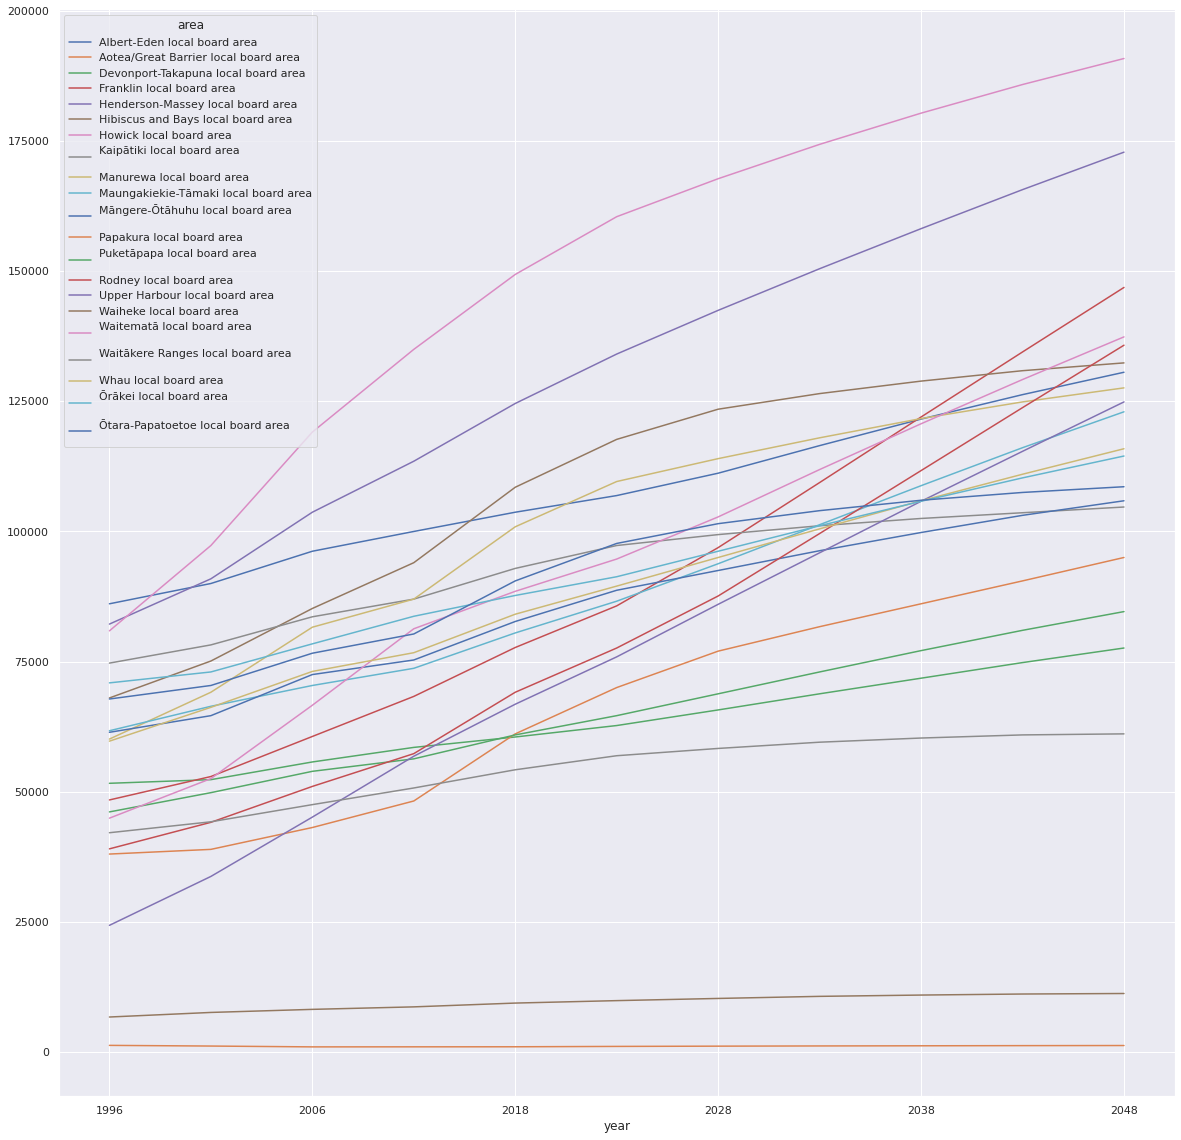

In [ ]:
pop[pop.area.str.contains("local")].pivot(index='year', columns='area', values='total').plot()

In [ ]:
# Restructure population data so we have one row per area, and all population projections in columns
rows = []
for area in pop.area.unique():
    row = {"area": area}
    for year in pop.year.unique():
        for c in ["0-14", "15-39", "40-64", "65+", "total", "median age"]:
            new_col = f"pop_{year}_{c}"
            value = pop.loc[(pop.year == year) & (pop.area == area), c].iloc[0]
            row[new_col] = value
    rows.append(row)
pop = pd.DataFrame(rows)
pop

,area,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,pop_1996_median age,pop_2001_0-14,pop_2001_15-39,pop_2001_40-64,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,Far North district,15200,17700,15600,6100,54500,33.4,14900,16400,18100,...,23700,23500,80600,48.1,14100,19400,24400,23800,81700,48.5
1,Whangārei district\n,17300,23300,19100,8700,68400,33.9,17000,21600,21700,...,34400,31700,116400,46.1,20100,30800,35800,32600,119300,46.3
2,Kaipara district,4700,5700,5200,2200,17800,34.4,4450,5150,6000,...,8200,10500,29800,52.9,4900,6500,8200,10700,30300,53.4
3,Auckland,255600,451400,296500,112300,1115800,32.1,277800,469900,351000,...,717000,402500,2207800,40.5,353000,754000,761900,434000,2302900,41.3
4,Thames-Coromandel district,5200,7100,8200,4800,25400,41.0,5000,6400,9100,...,9400,14300,33300,59.9,3800,5400,9400,14200,32800,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Māngere-Ōtāhuhu local board area\n,18500,25300,13600,4000,61400,26.7,20000,25200,15100,...,31400,16100,103100,37.1,20400,35200,33100,17300,105900,38.3
84,Ōtara-Papatoetoe local board area\n,19200,27900,15200,5500,67800,27.6,20500,27300,16900,...,35800,14800,107500,37.9,18800,37000,37000,15900,108600,39.1
85,Manurewa local board area,17700,25400,13200,3800,60100,27.7,20200,27300,16900,...,38700,19200,124900,37.4,24300,42300,40400,20500,127600,38.5
86,Papakura local board area,9700,15100,9700,3500,38000,30.3,10000,14400,10800,...,28700,14300,90500,38.0,18200,31400,29600,15800,95000,38.4


In [ ]:
cols = pop.columns[pop.columns!="area"].tolist()
cols

['pop_1996_0-14',
 'pop_1996_15-39',
 'pop_1996_40-64',
 'pop_1996_65+',
 'pop_1996_total',
 'pop_1996_median age',
 'pop_2001_0-14',
 'pop_2001_15-39',
 'pop_2001_40-64',
 'pop_2001_65+',
 'pop_2001_total',
 'pop_2001_median age',
 'pop_2006_0-14',
 'pop_2006_15-39',
 'pop_2006_40-64',
 'pop_2006_65+',
 'pop_2006_total',
 'pop_2006_median age',
 'pop_2013_0-14',
 'pop_2013_15-39',
 'pop_2013_40-64',
 'pop_2013_65+',
 'pop_2013_total',
 'pop_2013_median age',
 'pop_2018_0-14',
 'pop_2018_15-39',
 'pop_2018_40-64',
 'pop_2018_65+',
 'pop_2018_total',
 'pop_2018_median age',
 'pop_2023_0-14',
 'pop_2023_15-39',
 'pop_2023_40-64',
 'pop_2023_65+',
 'pop_2023_total',
 'pop_2023_median age',
 'pop_2028_0-14',
 'pop_2028_15-39',
 'pop_2028_40-64',
 'pop_2028_65+',
 'pop_2028_total',
 'pop_2028_median age',
 'pop_2033_0-14',
 'pop_2033_15-39',
 'pop_2033_40-64',
 'pop_2033_65+',
 'pop_2033_total',
 'pop_2033_median age',
 'pop_2038_0-14',
 'pop_2038_15-39',
 'pop_2038_40-64',
 'pop_2038_65+',

In [ ]:
pop.area.tolist()

['Far North district',
 'Whangārei district\n',
 'Kaipara district',
 'Auckland',
 'Thames-Coromandel district',
 'Hauraki district',
 'Waikato district',
 'Matamata-Piako district',
 'Hamilton city',
 'Waipa district',
 'Ōtorohanga district\n',
 'South Waikato district',
 'Waitomo district',
 'Taupō district\n',
 'Western Bay of Plenty district',
 'Tauranga city',
 'Rotorua district',
 'Whakatāne district\n',
 'Kawerau district',
 'Ōpōtiki district\n',
 'Gisborne district',
 'Wairoa district',
 'Hastings district',
 'Napier city',
 "Central Hawke's Bay district",
 'New Plymouth district',
 'Stratford district',
 'South Taranaki district',
 'Ruapehu district',
 'Whanganui district',
 'Rangitikei district',
 'Manawatū district\n',
 'Palmerston North city',
 'Tararua district',
 'Horowhenua district',
 'Kapiti Coast district',
 'Porirua city',
 'Upper Hutt city',
 'Lower Hutt city',
 'Wellington city',
 'Masterton district',
 'Carterton district',
 'South Wairarapa district',
 'Tasman di

In [ ]:
def normalise(string):
    return unidecode(string.lower().strip())
# Augment TALB geodataframe with population information
TALB = pd.merge(TALB,
               pop,
               left_on=TALB.TALB2021_V1_00_NAME.apply(normalise),
               right_on=pop.area.map(normalise),
               how="left")
TALB[["TALB2021_V1_00_NAME"] + cols]

,TALB2021_V1_00_NAME,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,pop_1996_median age,pop_2001_0-14,pop_2001_15-39,pop_2001_40-64,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,Far North District,15200,17700,15600,6100,54500,33.4,14900,16400,18100,...,23700,23500,80600,48.1,14100,19400,24400,23800,81700,48.5
1,Whangarei District,17300,23300,19100,8700,68400,33.9,17000,21600,21700,...,34400,31700,116400,46.1,20100,30800,35800,32600,119300,46.3
2,Kaipara District,4700,5700,5200,2200,17800,34.4,4450,5150,6000,...,8200,10500,29800,52.9,4900,6500,8200,10700,30300,53.4
3,Thames-Coromandel District,5200,7100,8200,4800,25400,41.0,5000,6400,9100,...,9400,14300,33300,59.9,3800,5400,9400,14200,32800,60.3
4,Hauraki District,5000,6250,5100,2250,18550,33.5,4550,5150,5700,...,6200,8200,22100,54.6,3200,4300,6100,8200,21800,55.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Māngere-Ōtāhuhu Local Board Area,18500,25300,13600,4000,61400,26.7,20000,25200,15100,...,31400,16100,103100,37.1,20400,35200,33100,17300,105900,38.3
83,Ōtara-Papatoetoe Local Board Area,19200,27900,15200,5500,67800,27.6,20500,27300,16900,...,35800,14800,107500,37.9,18800,37000,37000,15900,108600,39.1
84,Manurewa Local Board Area,17700,25400,13200,3800,60100,27.7,20200,27300,16900,...,38700,19200,124900,37.4,24300,42300,40400,20500,127600,38.5
85,Papakura Local Board Area,9700,15100,9700,3500,38000,30.3,10000,14400,10800,...,28700,14300,90500,38.0,18200,31400,29600,15800,95000,38.4


In [ ]:
assert all(~TALB.isna())

Text(0.5, 1.0, 'Population density by TALB with DHB boundaries and hospital locations')

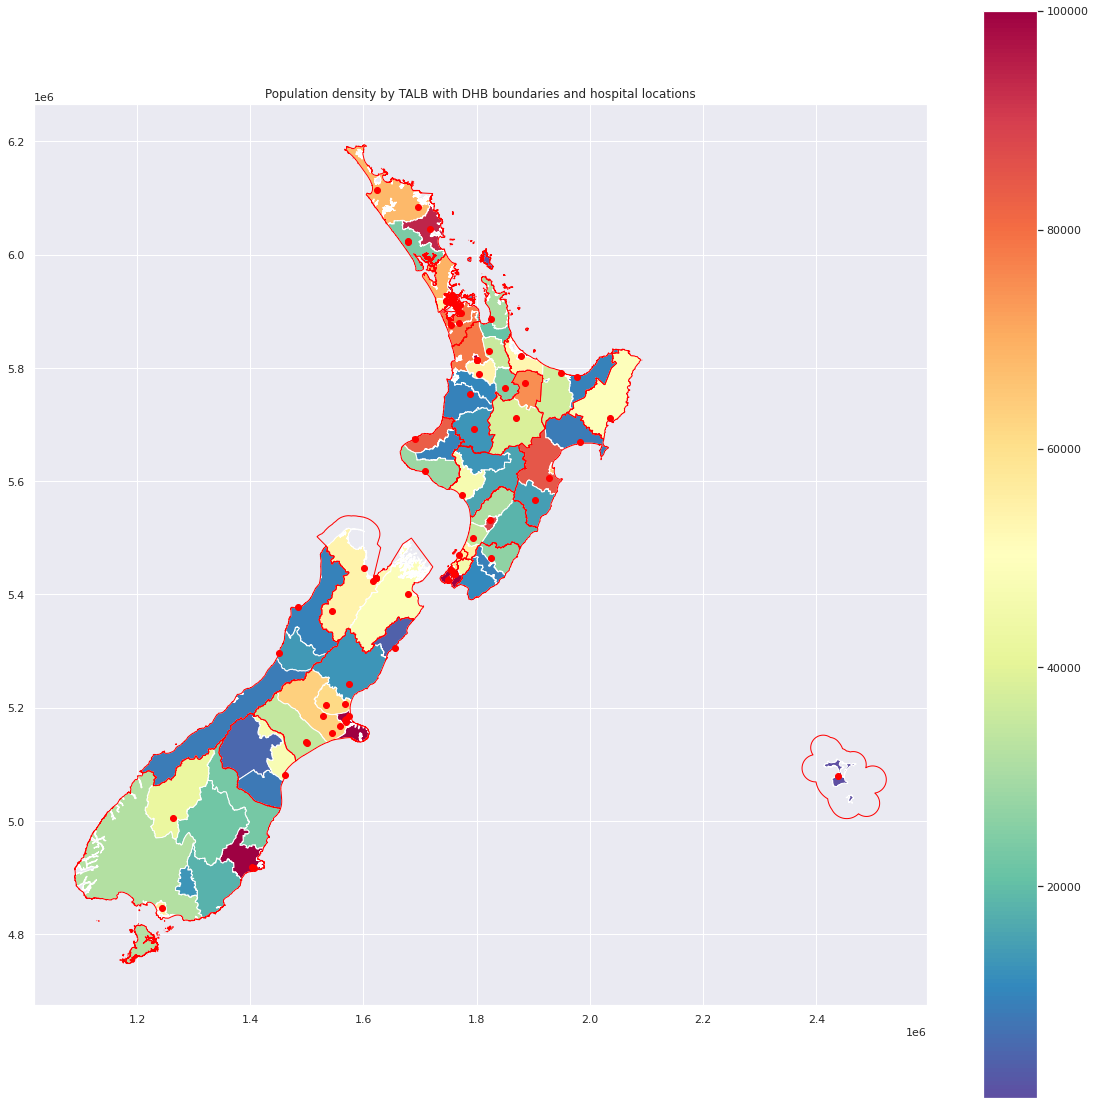

In [ ]:
ax = TALB.plot(column="pop_2018_total", cmap="Spectral_r", legend=True, vmax=1e5)
DHB.boundary.plot(ax=ax, color="red", linewidth=1)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")
plt.title("Population density by TALB with DHB boundaries and hospital locations")

[1704081.5934     5838535.95349979 1806275.24620008 6001802.16870022]


Text(0.5, 1.0, 'Population density by TALB with DHB boundaries and hospital locations')

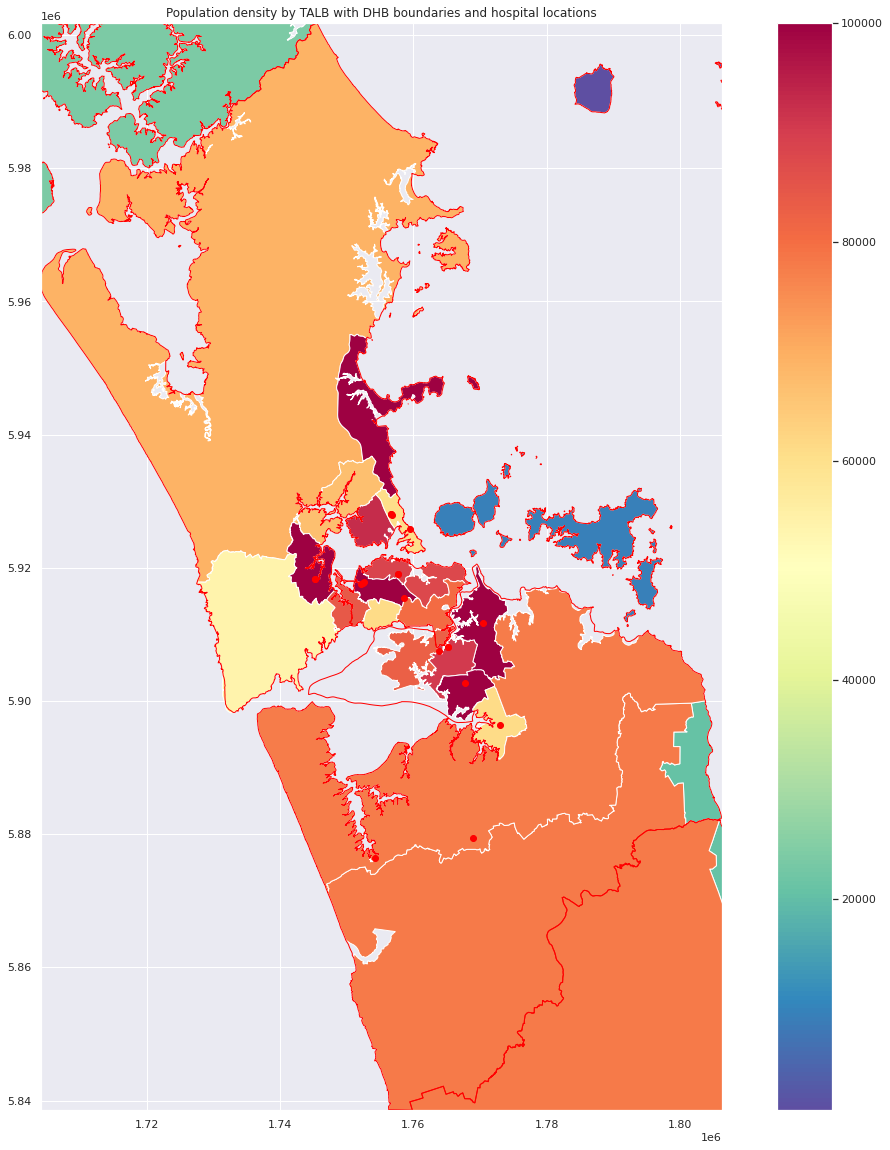

In [ ]:
AKL_bounds = DHB[DHB.DHB2015_Name.isin(["Counties Manukau", "Waitemata"])].total_bounds
print(AKL_bounds)
ax = TALB.plot(column="pop_2018_total", cmap="Spectral_r", legend=True, vmax=1e5)
DHB.boundary.plot(ax=ax, color="red", linewidth=1)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")
ax.set_xlim(AKL_bounds[0], AKL_bounds[2])
ax.set_ylim(AKL_bounds[1], AKL_bounds[3])
plt.title("Population density by TALB with DHB boundaries and hospital locations")

In [ ]:
DHB["TALBs"] = DHB.geometry.progress_apply(
    lambda poly: ",".join(
        TALB.TALB2021_V1_00_NAME[TALB.representative_point().intersects(poly)]
    )
)
with pd.option_context('display.max_colwidth', None):
    display(DHB[["DHB2015_Name", "TALBs"]])

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Name,TALBs
0,Northland,"Far North District,Whangarei District,Kaipara District"
1,Waitemata,"Rodney Local Board Area,Hibiscus and Bays Local Board Area,Upper Harbour Local Board Area,Kaipātiki Local Board Area,Devonport-Takapuna Local Board Area,Henderson-Massey Local Board Area,Waitākere Ranges Local Board Area"
2,Auckland,"Aotea/Great Barrier Local Board Area,Waiheke Local Board Area,Waitematā Local Board Area,Whau Local Board Area,Albert-Eden Local Board Area,Puketāpapa Local Board Area,Ōrākei Local Board Area,Maungakiekie-Tāmaki Local Board Area"
3,Counties Manukau,"Howick Local Board Area,Māngere-Ōtāhuhu Local Board Area,Ōtara-Papatoetoe Local Board Area,Manurewa Local Board Area,Papakura Local Board Area,Franklin Local Board Area"
4,Waikato,"Thames-Coromandel District,Hauraki District,Waikato District,Matamata-Piako District,Hamilton City,Waipa District,Ōtorohanga District,South Waikato District,Waitomo District,Ruapehu District"
5,Lakes,"Taupo District,Rotorua District"
6,Bay of Plenty,"Western Bay of Plenty District,Tauranga City,Whakatane District,Kawerau District,Ōpōtiki District"
7,Tairawhiti,Gisborne District
8,Taranaki,"New Plymouth District,Stratford District,South Taranaki District"
9,Hawke's Bay,"Wairoa District,Hastings District,Napier City,Central Hawke's Bay District"


In [ ]:
def get_DHB_pop(poly):
    mask = TALB.representative_point().intersects(poly)
    result = TALB.loc[mask, cols].sum()
    result.update(TALB.loc[mask, [c for c in cols if "median" in c]].median())
    return result
result = DHB.geometry.progress_apply(get_DHB_pop)
DHB = pd.concat([DHB, result], axis='columns')
DHB

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,66300.0,65700.0,226800.0,48.10,39100.0,56700.0,68400.0,67100.0,231300.0,48.50
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,252500.0,155400.0,775100.0,41.20,127800.0,249200.0,264300.0,168200.0,809400.0,41.80
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,226460.0,112450.0,686180.0,40.60,89660.0,260580.0,248410.0,119650.0,718400.0,41.50
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,237900.0,134800.0,746400.0,37.95,135700.0,244100.0,249000.0,146200.0,774900.0,38.80
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,167850.0,132190.0,562780.0,45.75,97040.0,169260.0,174120.0,138900.0,579220.0,46.70
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,38200.0,31900.0,127800.0,45.30,21600.0,35300.0,39000.0,32600.0,128600.0,45.95
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,94260.0,88820.0,315410.0,47.40,50930.0,82910.0,96950.0,92840.0,323630.0,49.00
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,16500.0,13100.0,55000.0,43.40,10400.0,14500.0,16900.0,13400.0,55200.0,44.10
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,40450.0,36250.0,137150.0,44.90,23450.0,37050.0,40800.0,37250.0,138400.0,45.60
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,59730.0,53950.0,199530.0,46.60,33670.0,51940.0,61190.0,55310.0,201960.0,47.60


Text(0.5, 1.0, 'Population by DHB in 2018')

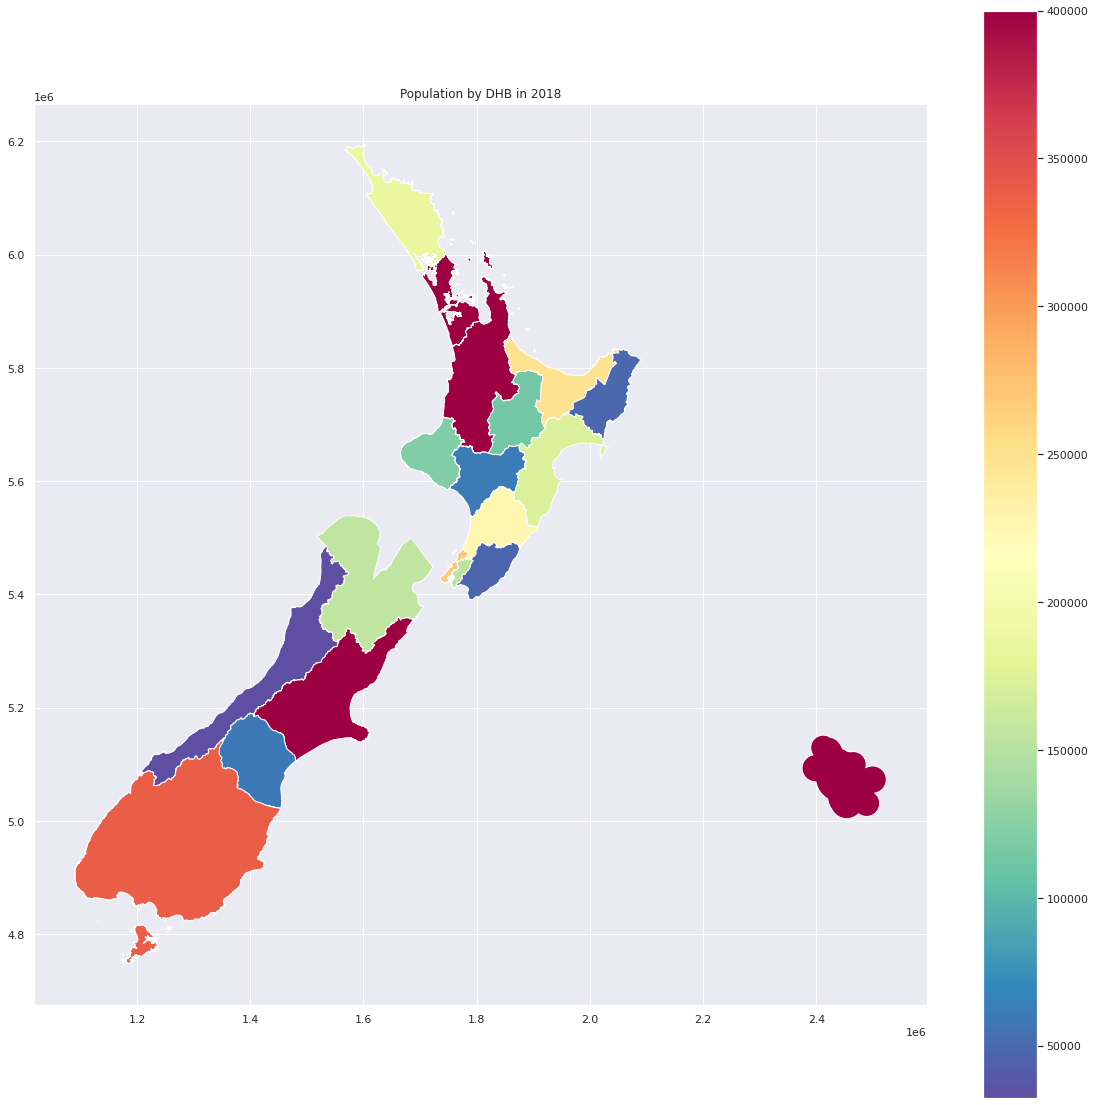

In [ ]:
ax = DHB.plot(column="pop_2018_total", legend=True, cmap="Spectral_r", vmax=4e5)
ax.set_title("Population by DHB in 2018")

In [ ]:
# Interpolate population data between 2014-2018, so we have matching population data for each year of hospital discharge data
for c in ["0-14", "15-39", "40-64", "65+", "total", "median age"]:
    for year in range(2014, 2018):
        DHB[f"pop_{year}_{c}"] = np.nan
    DHB.update(DHB[[f"pop_{year}_{c}" for year in range(2013,2019)]].interpolate(axis=1))

In [ ]:
# Load all hospital discharge data from 2013-2019 into one data frame
discharges = []
for f in glob("input/hospital_discharges/*"):
    print(f)
    try:
        df = pd.read_csv(
            zipfile.ZipFile(f).open('PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252'
        )
    except KeyError:
        df = pd.read_csv(
            zipfile.ZipFile(f).open('PubFund_Data/PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252'
        )
    df.DHB.replace("Midcentral", "MidCentral", inplace=True)
    discharges.append(df)
discharges = pd.concat(discharges)
discharges

input/hospital_discharges/pubfund2016_17data.zip
input/hospital_discharges/pubfund2015_16data.zip
input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip
input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip
input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip
input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip


,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
0,2016/17,Counties Manukau,Pacific,Male,65-69,A00,A00 Cholera,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
1,2016/17,Auckland,Maori,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
2,2016/17,Auckland,Other,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
3,2016/17,Counties Manukau,Pacific,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
4,2016/17,Auckland,Maori,Male,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
409504,20182019,Wairarapa,Other,Male,55-59,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409505,20182019,Waikato,Other,Male,60-64,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409506,20182019,Northland,Maori,Female,00-04,Z82,Z82 Family history of certain disabilities and...,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409507,20182019,Northland,Maori,Male,25-29,Z84,Z84 Family history of other conditions,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN


In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(discharges.sort_values(by="Discharges", ascending=False).head(10))

,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
344935,2014/15,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2148,NaN
354531,2016/17,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2099,NaN
345001,2014/15,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2086,NaN
364182,2017/18,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2067,NaN
354593,2016/17,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2034,NaN
339132,2013/14,Waitemata,Other,Male,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2030,Z38
339066,2013/14,Waitemata,Other,Female,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2025,Z38
349182,2015/16,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1991,NaN
364244,2017/18,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1982,NaN
349244,2015/16,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1933,NaN


The most common discharge reason appears to be for childbirth

In [ ]:
discharges.groupby("DHB")["Discharges"].sum().sort_values(ascending=False)

DHB
Waitemata             924552
Counties Manukau      786348
Canterbury            737913
Waikato               686812
Auckland              638673
Southern              469828
Capital and Coast     393409
Bay of Plenty         388231
Northland             305592
Hawke's Bay           266436
MidCentral            258823
Hutt Valley           238268
Taranaki              211696
Nelson Marlborough    204635
Lakes                 181994
Whanganui             119105
South Canterbury       99051
Tairawhiti             75723
Wairarapa              74094
West Coast             56462
Unknown                34050
Name: Discharges, dtype: int64

Waitemata DHB had the most overall discharges from 2013-2019 

In [ ]:
# Looks like there's some variation in how chapters are recorded - let's make it a bit more consistent
chapters = discharges.ICDChapter.unique().tolist()
chapters

['Chapter  1 Certain infectious and parasitic diseases',
 'Chapter  2 Neoplasms',
 'Chapter  3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter  4 Endocrine, nutritional and metabolic diseases',
 'Chapter  5 Mental and behavioural disorders',
 'Chapter  6 Diseases of the nervous system',
 'Chapter  7 Diseases of the eye and adnexa',
 'Chapter  8 Diseases of the ear and mastoid process',
 'Chapter  9 Diseases of the circulatory system',
 'Chapter 10 Diseases of the respiratory system',
 'Chapter 11 Diseases of the digestive system',
 'Chapter 12 Diseases of the skin and subcutaneous tissue',
 'Chapter 13 Diseases of the musculoskeletal system and connective tissue',
 'Chapter 14 Diseases of the genitourinary system',
 'Chapter 15 Pregnancy, childbirth and the puerperium',
 'Chapter 16 Certain conditions originating in the perinatal period',
 'Chapter 17 Congenital malformations, deformations and chromosomal abnormalities',
 'Cha

In [ ]:
target_chapters = chapters[40:49] + chapters[9:20]
target_chapters

['Chapter 1 Certain infectious and parasitic diseases',
 'Chapter 2 Neoplasms',
 'Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter 4 Endocrine, nutritional and metabolic diseases',
 'Chapter 5 Mental and behavioural disorders',
 'Chapter 6 Diseases of the nervous system',
 'Chapter 7 Diseases of the eye and adnexa',
 'Chapter 8 Diseases of the ear and mastoid process',
 'Chapter 9 Diseases of the circulatory system',
 'Chapter 10 Diseases of the respiratory system',
 'Chapter 11 Diseases of the digestive system',
 'Chapter 12 Diseases of the skin and subcutaneous tissue',
 'Chapter 13 Diseases of the musculoskeletal system and connective tissue',
 'Chapter 14 Diseases of the genitourinary system',
 'Chapter 15 Pregnancy, childbirth and the puerperium',
 'Chapter 16 Certain conditions originating in the perinatal period',
 'Chapter 17 Congenital malformations, deformations and chromosomal abnormalities',
 'Chapter 18 S

In [ ]:
replacement_dict = {k: v for k,v in zip(chapters[:9], target_chapters[:9])}
replacement_dict.update({k: v for k,v in zip(chapters[20:40], target_chapters)})
replacement_dict

{'Chapter  1 Certain infectious and parasitic diseases': 'Chapter 1 Certain infectious and parasitic diseases',
 'Chapter  2 Neoplasms': 'Chapter 2 Neoplasms',
 'Chapter  3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism': 'Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter  4 Endocrine, nutritional and metabolic diseases': 'Chapter 4 Endocrine, nutritional and metabolic diseases',
 'Chapter  5 Mental and behavioural disorders': 'Chapter 5 Mental and behavioural disorders',
 'Chapter  6 Diseases of the nervous system': 'Chapter 6 Diseases of the nervous system',
 'Chapter  7 Diseases of the eye and adnexa': 'Chapter 7 Diseases of the eye and adnexa',
 'Chapter  8 Diseases of the ear and mastoid process': 'Chapter 8 Diseases of the ear and mastoid process',
 'Chapter  9 Diseases of the circulatory system': 'Chapter 9 Diseases of the circulatory system',
 'A00–B99 Certain in

In [ ]:
discharges.ICDChapter = discharges.ICDChapter.replace(replacement_dict)
discharges.ICDChapter.value_counts(dropna=False)

Chapter 19 Injury, poisoning and certain other consequences external causes                                  493542
Chapter 11 Diseases of the digestive system                                                                  200696
Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified           182502
Chapter 9 Diseases of the circulatory system                                                                 155399
Chapter 2 Neoplasms                                                                                          144812
Chapter 13 Diseases of the musculoskeletal system and connective tissue                                      143358
Chapter 10 Diseases of the respiratory system                                                                141126
Chapter 14 Diseases of the genitourinary system                                                              119736
Chapter 21 Factors influencing health status and contact with health ser

In [ ]:
discharges["ICDSubgroup"].value_counts(dropna=False).head(20)

S00–S09 Injuries to the head                                                            90762
Z40–Z54 Persons encountering health services for specific procedures and health care    63054
S60–S69 Injuries to the wrist and hand                                                  57905
I30–I52 Other forms of heart disease                                                    45265
R50–R69 General symptoms and signs                                                      44658
S80–S89 Injuries to the knee and lower leg                                              42575
J09–J18 Influenza and pneumonia                                                         37131
L00–L08 Infections of the skin and subcutaneous tissue                                  34612
T80–T88 Complications of surgical and medical care, not elsewhere classified            34321
R00–R09 Symptoms and signs involving the circulatory and respiratory systems            32782
K55–K64 Other diseases of intestines                        

In [ ]:
discharges["ICDThreeChar"].value_counts(dropna=False).head(20)

S06 Intracranial injury                                29367
Z50 Care involving use of rehabilitation procedures    27225
S82 Fracture of lower leg, including ankle             26338
S52 Fracture of forearm                                23616
L03 Cellulitis                                         23534
S62 Fracture at wrist and hand level                   19440
S01 Open wound of head                                 18676
J18 Pneumonia, organism unspecified                    16995
S42 Fracture of shoulder and upper arm                 16777
S09 Other and unspecified injuries of head             15398
R55 Syncope and collapse                               15338
S61 Open wound of wrist and hand                       14453
R10 Abdominal and pelvic pain                          14000
R07 Pain in throat and chest                           13648
S02 Fracture of skull and facial bones                 12906
N39 Other disorders of urinary system                  12753
I21 Acute myocardial inf

Text(0, 0.5, '# discharges')

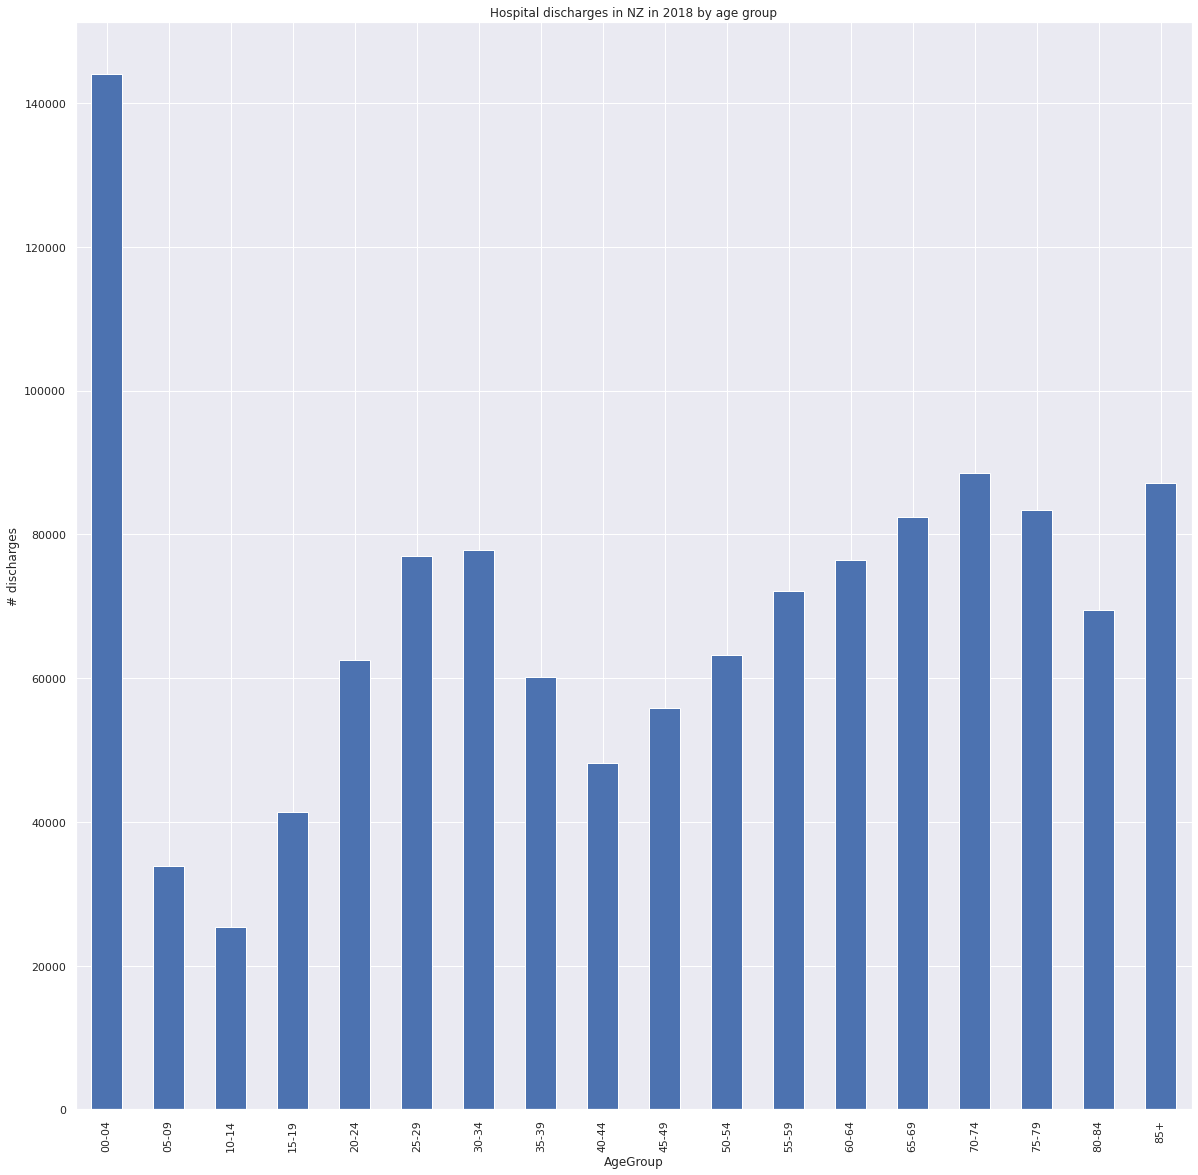

In [ ]:
discharges[discharges.FinancialYear == 20182019].groupby("AgeGroup")["Discharges"].sum().plot.bar()
plt.title("Hospital discharges in NZ in 2018 by age group")
plt.ylabel("# discharges")

In [ ]:
discharges.FinancialYear.value_counts(dropna=False)

20182019    409509
2017/18     377960
2016/17     368295
2015/16     362851
2014/15     358697
2013/14     352666
Name: FinancialYear, dtype: int64

In [ ]:
discharges["year"] = discharges.FinancialYear.astype(str).str.slice(stop=4)
discharges.year.value_counts(dropna=False)

2018    409509
2017    377960
2016    368295
2015    362851
2014    358697
2013    352666
Name: year, dtype: int64

In [ ]:
discharge_years = sorted(discharges.year.unique())
discharge_years

['2013', '2014', '2015', '2016', '2017', '2018']

In [ ]:
# Restructure discharge data so we have one row per DHB, and separate chapter discharge data in columns
rows = []
for d in tqdm(discharges.DHB.unique()):
    row = {"DHB": d}
    discharges_for_dhb = discharges[discharges.DHB == d]
    for year in sorted(discharges.year.unique()):
        discharges_for_year = discharges_for_dhb[discharges_for_dhb.year == year]
        for chapter in target_chapters:
            new_col = f"discharges_{year}_{chapter}"
            value = discharges_for_year.Discharges[discharges_for_year.ICDChapter == chapter].sum()
            row[new_col] = value
    rows.append(row)
discharges = pd.DataFrame(rows)
discharges

  0%|          | 0/21 [00:00<?, ?it/s]

,DHB,discharges_2013_Chapter 1 Certain infectious and parasitic diseases,discharges_2013_Chapter 2 Neoplasms,discharges_2013_Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"discharges_2013_Chapter 4 Endocrine, nutritional and metabolic diseases",discharges_2013_Chapter 5 Mental and behavioural disorders,discharges_2013_Chapter 6 Diseases of the nervous system,discharges_2013_Chapter 7 Diseases of the eye and adnexa,discharges_2013_Chapter 8 Diseases of the ear and mastoid process,discharges_2013_Chapter 9 Diseases of the circulatory system,...,discharges_2018_Chapter 11 Diseases of the digestive system,discharges_2018_Chapter 12 Diseases of the skin and subcutaneous tissue,discharges_2018_Chapter 13 Diseases of the musculoskeletal system and connective tissue,discharges_2018_Chapter 14 Diseases of the genitourinary system,"discharges_2018_Chapter 15 Pregnancy, childbirth and the puerperium",discharges_2018_Chapter 16 Certain conditions originating in the perinatal period,"discharges_2018_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","discharges_2018_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes",discharges_2018_Chapter 21 Factors influencing health status and contact with health services
0,Counties Manukau,4063,7369,1614,3240,2160,2974,2559,1300,7884,...,9194,4086,6683,6970,13383,3514,971,11889,14297,17126
1,Auckland,3520,4967,1047,2243,2284,2354,2614,1198,6093,...,8010,3347,6104,5559,9288,1466,703,10550,13551,13934
2,Hawke's Bay,1223,3068,459,866,810,911,1314,325,3495,...,4635,1168,2903,2335,3548,833,363,5927,5391,3692
3,Waitemata,4589,8449,1825,2649,2845,3212,2569,1419,9970,...,15607,4096,8960,8068,11635,1855,1137,18698,18301,17270
4,MidCentral,1136,3234,511,1083,943,1127,1063,322,3309,...,3766,893,2419,2211,3637,606,290,5018,4628,4500
5,Waikato,2627,7088,1421,2170,2141,3025,2214,975,6557,...,11382,2898,5718,5377,8709,1547,667,14358,13669,17464
6,Whanganui,658,1582,141,409,364,463,264,122,1610,...,2003,511,1289,1167,1350,218,113,2307,2357,1500
7,Hutt Valley,1166,2449,584,763,832,921,665,366,2667,...,4227,1199,2070,1953,3415,639,270,5238,4548,3828
8,Lakes,837,1745,552,550,610,683,632,320,2132,...,3017,694,1561,1495,2623,630,267,3505,3372,2897
9,Canterbury,2773,8920,1340,2169,3353,2772,2133,1044,8365,...,10511,2696,8102,6404,11841,2171,847,9728,14191,17704


In [ ]:
discharges = discharges.set_index("DHB")

In [ ]:
DHB = DHB.merge(discharges, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,discharges_2018_Chapter 11 Diseases of the digestive system,discharges_2018_Chapter 12 Diseases of the skin and subcutaneous tissue,discharges_2018_Chapter 13 Diseases of the musculoskeletal system and connective tissue,discharges_2018_Chapter 14 Diseases of the genitourinary system,"discharges_2018_Chapter 15 Pregnancy, childbirth and the puerperium",discharges_2018_Chapter 16 Certain conditions originating in the perinatal period,"discharges_2018_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","discharges_2018_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes",discharges_2018_Chapter 21 Factors influencing health status and contact with health services
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,5980,1206,2265,2182,3516,672,314,6104,5601,5415
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,15607,4096,8960,8068,11635,1855,1137,18698,18301,17270
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,8010,3347,6104,5559,9288,1466,703,10550,13551,13934
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,9194,4086,6683,6970,13383,3514,971,11889,14297,17126
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,11382,2898,5718,5377,8709,1547,667,14358,13669,17464
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,3017,694,1561,1495,2623,630,267,3505,3372,2897
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,7557,1412,3660,3133,4739,1006,433,7426,7540,6003
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,1274,446,623,673,903,179,119,1376,1424,1693
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,3465,913,2694,1661,2626,622,178,5475,4076,3601
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,4635,1168,2903,2335,3548,833,363,5927,5391,3692


In [ ]:
header = []
for k in ["Total households", "median", "<$20K", "$20K-$30K", "$30K-$50K",
            "$50K-$70K", "$70K-$100K", "$100K-$150K", ">$150K", "Total households stated", "Not stated"]:
    header.append("income_2013_" + k)
    header.append("income_2018_" + k)
header = ["area"] + header
income = pd.read_excel("input/total_household_income_2013_2018_census_by_DHB.xlsx",
                        skiprows=5,
                        names=header,
                        usecols="A,C:X",
                        index_col=0,
                        nrows=20)
income[income.columns[income.columns!="area"]]
income

,income_2013_Total households,income_2018_Total households,income_2013_median,income_2018_median,income_2013_<$20K,income_2018_<$20K,income_2013_$20K-$30K,income_2018_$20K-$30K,income_2013_$30K-$50K,income_2018_$30K-$50K,...,income_2013_$70K-$100K,income_2018_$70K-$100K,income_2013_$100K-$150K,income_2018_$100K-$150K,income_2013_>$150K,income_2018_>$150K,income_2013_Total households stated,income_2018_Total households stated,income_2013_Not stated,income_2018_Not stated
area,,,,,,,,,,,,,,,,,,,,,
Northland,58944,64251,46900,57000,7623,7248,7131,7617,10395,10995,...,7545,8895,4929,8919,2772,5679,47625,58182,11322,6069
Waitemata,181143,193440,75800,94000,13437,12399,13971,13482,23754,21171,...,28158,26706,29928,38730,24771,44724,154764,177660,26376,15780
Auckland,153363,159009,80100,97900,14766,13647,9990,9948,16998,15324,...,20529,19746,22134,27447,28845,43782,129141,145278,24222,13734
Counties Manukau,140523,150702,73500,90100,11328,11289,9774,9987,17217,16431,...,21465,21345,21651,30867,15852,30552,112914,136875,27609,13830
Waikato,133578,144243,58900,68500,13656,12924,13401,14115,21609,21543,...,20580,21690,16398,24915,10473,18555,113349,133143,20229,11100
Lakes,37086,38886,55900,65500,3756,3297,3732,3849,6111,5907,...,5589,6090,4014,6222,2127,3975,30243,34812,6840,4074
Bay of Plenty,79299,87105,54600,67200,7980,6804,8769,9201,14274,13821,...,11724,12789,8922,14688,5040,10887,67164,79737,12135,7368
Tairawhiti,15993,16410,50500,57900,1950,1812,1755,1947,2661,2712,...,2241,2412,1413,2334,732,1350,12852,14928,3141,1482
Taranaki,43080,45306,58400,63500,4377,4329,4545,5076,6939,7353,...,6531,6888,5088,7230,3486,5148,36600,42324,6480,2982


In [ ]:
# Interpolate income data between 2014-2018, so we have matching income data for each year of hospital discharge data
for c in ["median", "<$20K", "$20K-$30K", "$30K-$50K",
            "$50K-$70K", "$70K-$100K", "$100K-$150K", ">$150K"]:
    for year in range(2014, 2018):
        income[f"income_{year}_{c}"] = np.nan
    income.update(income[[f"income_{year}_{c}" for year in range(2013,2019)]].interpolate(axis=1))
income

,income_2013_Total households,income_2018_Total households,income_2013_median,income_2018_median,income_2013_<$20K,income_2018_<$20K,income_2013_$20K-$30K,income_2018_$20K-$30K,income_2013_$30K-$50K,income_2018_$30K-$50K,...,income_2016_$70K-$100K,income_2017_$70K-$100K,income_2014_$100K-$150K,income_2015_$100K-$150K,income_2016_$100K-$150K,income_2017_$100K-$150K,income_2014_>$150K,income_2015_>$150K,income_2016_>$150K,income_2017_>$150K
area,,,,,,,,,,,,,,,,,,,,,
Northland,58944,64251,46900.0,57000.0,7623.0,7248.0,7131.0,7617.0,10395.0,10995.0,...,8355.0,8625.0,5727.0,6525.0,7323.0,8121.0,3353.4,3934.8,4516.2,5097.6
Waitemata,181143,193440,75800.0,94000.0,13437.0,12399.0,13971.0,13482.0,23754.0,21171.0,...,27286.8,26996.4,31688.4,33448.8,35209.2,36969.6,28761.6,32752.2,36742.8,40733.4
Auckland,153363,159009,80100.0,97900.0,14766.0,13647.0,9990.0,9948.0,16998.0,15324.0,...,20059.2,19902.6,23196.6,24259.2,25321.8,26384.4,31832.4,34819.8,37807.2,40794.6
Counties Manukau,140523,150702,73500.0,90100.0,11328.0,11289.0,9774.0,9987.0,17217.0,16431.0,...,21393.0,21369.0,23494.2,25337.4,27180.6,29023.8,18792.0,21732.0,24672.0,27612.0
Waikato,133578,144243,58900.0,68500.0,13656.0,12924.0,13401.0,14115.0,21609.0,21543.0,...,21246.0,21468.0,18101.4,19804.8,21508.2,23211.6,12089.4,13705.8,15322.2,16938.6
Lakes,37086,38886,55900.0,65500.0,3756.0,3297.0,3732.0,3849.0,6111.0,5907.0,...,5889.6,5989.8,4455.6,4897.2,5338.8,5780.4,2496.6,2866.2,3235.8,3605.4
Bay of Plenty,79299,87105,54600.0,67200.0,7980.0,6804.0,8769.0,9201.0,14274.0,13821.0,...,12363.0,12576.0,10075.2,11228.4,12381.6,13534.8,6209.4,7378.8,8548.2,9717.6
Tairawhiti,15993,16410,50500.0,57900.0,1950.0,1812.0,1755.0,1947.0,2661.0,2712.0,...,2343.6,2377.8,1597.2,1781.4,1965.6,2149.8,855.6,979.2,1102.8,1226.4
Taranaki,43080,45306,58400.0,63500.0,4377.0,4329.0,4545.0,5076.0,6939.0,7353.0,...,6745.2,6816.6,5516.4,5944.8,6373.2,6801.6,3818.4,4150.8,4483.2,4815.6


<AxesSubplot:xlabel='area'>

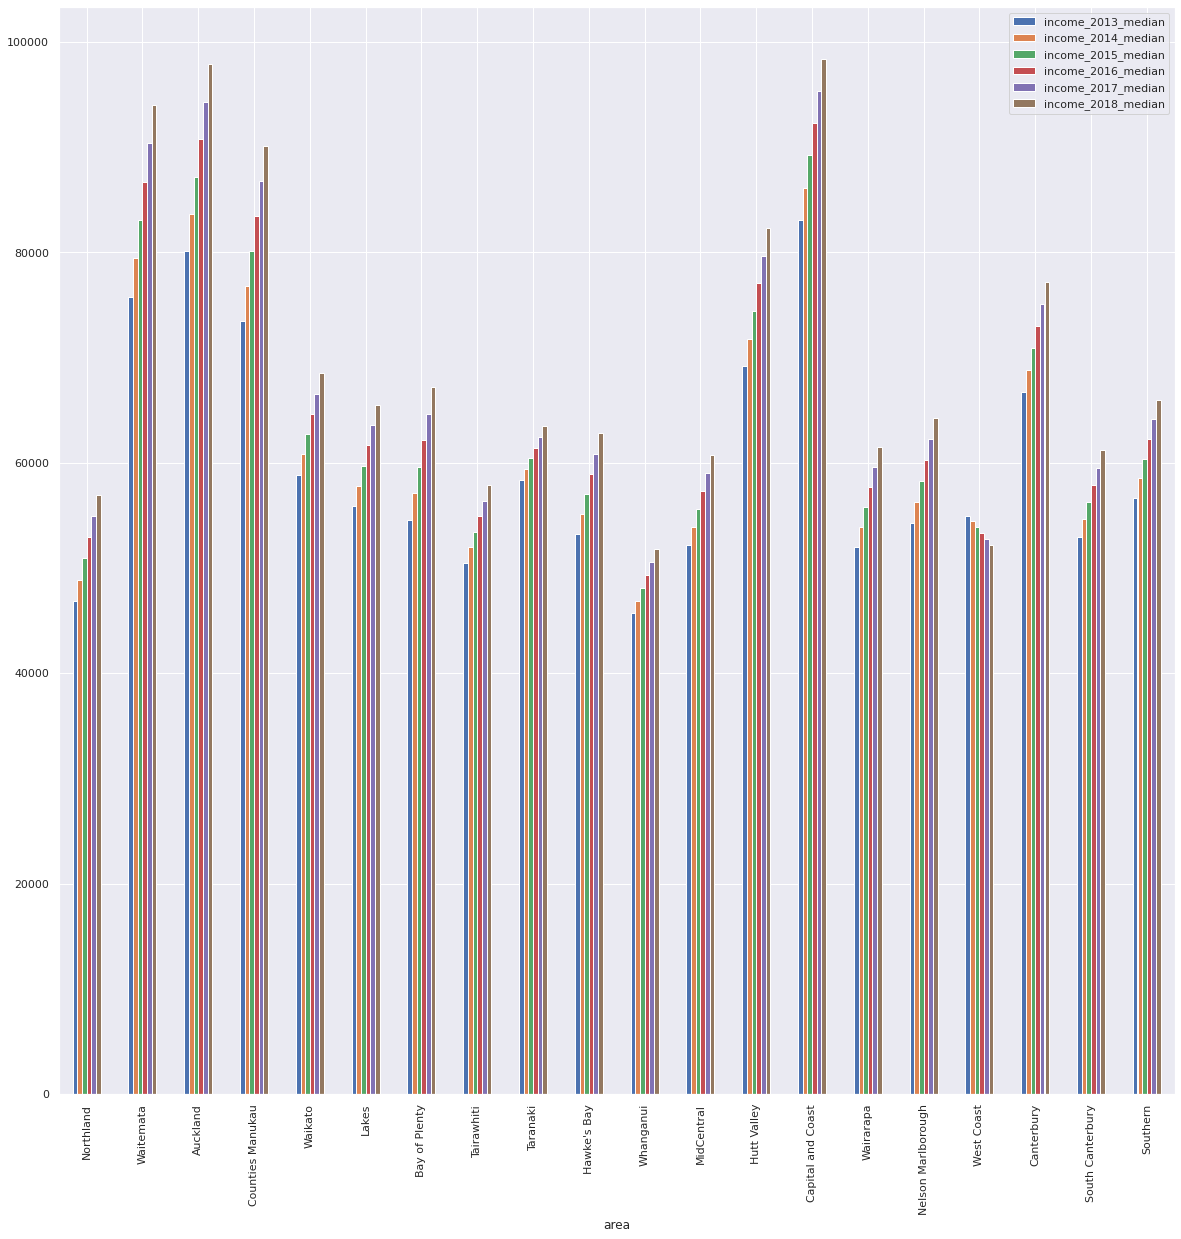

In [ ]:
income[[f"income_{year}_median" for year in range(2013, 2019)]].plot(kind="bar")

In [ ]:
DHB = DHB.merge(income, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,income_2016_$70K-$100K,income_2017_$70K-$100K,income_2014_$100K-$150K,income_2015_$100K-$150K,income_2016_$100K-$150K,income_2017_$100K-$150K,income_2014_>$150K,income_2015_>$150K,income_2016_>$150K,income_2017_>$150K
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,8355.0,8625.0,5727.0,6525.0,7323.0,8121.0,3353.4,3934.8,4516.2,5097.6
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,27286.8,26996.4,31688.4,33448.8,35209.2,36969.6,28761.6,32752.2,36742.8,40733.4
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,20059.2,19902.6,23196.6,24259.2,25321.8,26384.4,31832.4,34819.8,37807.2,40794.6
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,21393.0,21369.0,23494.2,25337.4,27180.6,29023.8,18792.0,21732.0,24672.0,27612.0
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,21246.0,21468.0,18101.4,19804.8,21508.2,23211.6,12089.4,13705.8,15322.2,16938.6
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,5889.6,5989.8,4455.6,4897.2,5338.8,5780.4,2496.6,2866.2,3235.8,3605.4
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,12363.0,12576.0,10075.2,11228.4,12381.6,13534.8,6209.4,7378.8,8548.2,9717.6
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,2343.6,2377.8,1597.2,1781.4,1965.6,2149.8,855.6,979.2,1102.8,1226.4
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,6745.2,6816.6,5516.4,5944.8,6373.2,6801.6,3818.4,4150.8,4483.2,4815.6
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,9117.6,9241.8,6699.0,7434.0,8169.0,8904.0,3682.2,4262.4,4842.6,5422.8


In [ ]:
print(DHB.columns.tolist())

['DHB2015_Code', 'DHB2015_Name', 'Shape_Length', 'geometry', 'TALBs', 'pop_1996_0-14', 'pop_1996_15-39', 'pop_1996_40-64', 'pop_1996_65+', 'pop_1996_total', 'pop_1996_median age', 'pop_2001_0-14', 'pop_2001_15-39', 'pop_2001_40-64', 'pop_2001_65+', 'pop_2001_total', 'pop_2001_median age', 'pop_2006_0-14', 'pop_2006_15-39', 'pop_2006_40-64', 'pop_2006_65+', 'pop_2006_total', 'pop_2006_median age', 'pop_2013_0-14', 'pop_2013_15-39', 'pop_2013_40-64', 'pop_2013_65+', 'pop_2013_total', 'pop_2013_median age', 'pop_2018_0-14', 'pop_2018_15-39', 'pop_2018_40-64', 'pop_2018_65+', 'pop_2018_total', 'pop_2018_median age', 'pop_2023_0-14', 'pop_2023_15-39', 'pop_2023_40-64', 'pop_2023_65+', 'pop_2023_total', 'pop_2023_median age', 'pop_2028_0-14', 'pop_2028_15-39', 'pop_2028_40-64', 'pop_2028_65+', 'pop_2028_total', 'pop_2028_median age', 'pop_2033_0-14', 'pop_2033_15-39', 'pop_2033_40-64', 'pop_2033_65+', 'pop_2033_total', 'pop_2033_median age', 'pop_2038_0-14', 'pop_2038_15-39', 'pop_2038_40-64

In [ ]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)

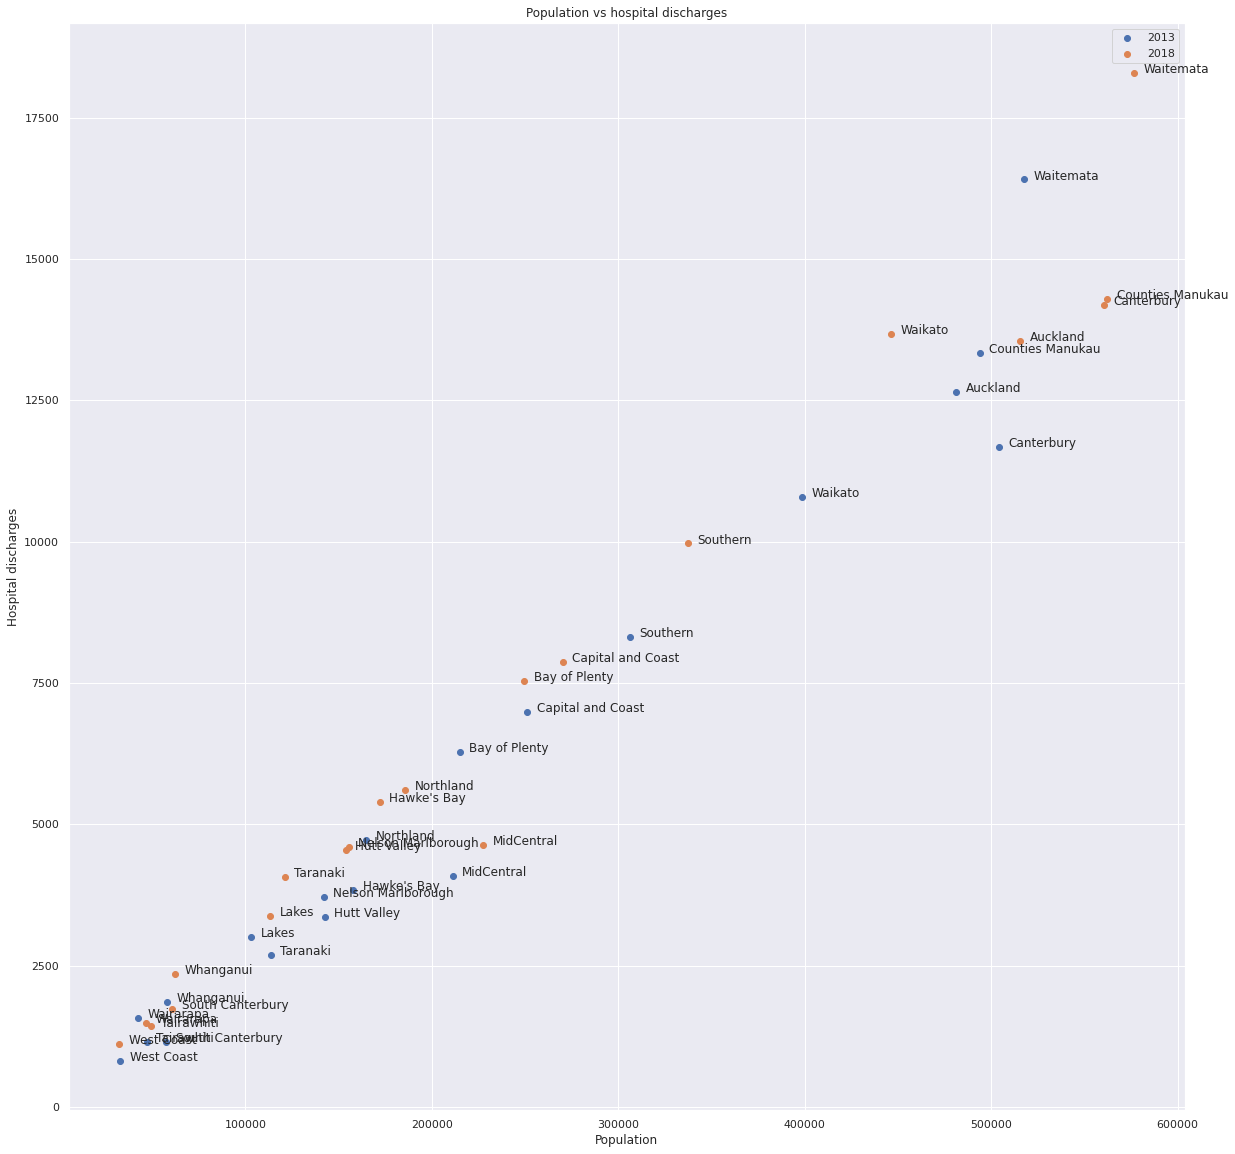

In [ ]:
plt.scatter(DHB.pop_2013_total, DHB["discharges_2013_Chapter 19 Injury, poisoning and certain other consequences external causes"], label="2013")
plt.scatter(DHB.pop_2018_total, DHB["discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes"], label="2018")
for i, d in DHB.iterrows():
    plt.text(d.pop_2013_total + 5e3, d["discharges_2013_Chapter 19 Injury, poisoning and certain other consequences external causes"], d.DHB2015_Name)
    plt.text(d.pop_2018_total + 5e3, d["discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes"], d.DHB2015_Name)
plt.xlabel("Population")
plt.ylabel("Hospital discharges")
plt.title("Population vs hospital discharges")
plt.legend()

This looks pretty linearly correlated, so a linear model should be able to predict this nicely

# Train some models

In [ ]:
def get_data_for_year(year, drop_pop_total = True, total_pop_only = False, include_DHB_code = True, income="all", per_1K=False):
    year = str(year)
    x_cols = []
    if include_DHB_code:
        x_cols.append("DHB2015_Code")
    if total_pop_only:
        x_cols.append(f"pop_{year}_total")
    else:
        x_cols.extend(list(DHB.columns[DHB.columns.str.contains(f"pop_{year}")]))
    if drop_pop_total:
        x_cols.remove(f"pop_{year}_total")
    if income == "median":
        x_cols.append(f"income_{year}_median")
    elif income == "all":
        x_cols.extend([c for c in DHB.columns if c.startswith(f"income_{year}") and ("median" in c or "$" in c)])
    y_cols = list(DHB.columns[DHB.columns.str.contains(f"discharges_{year}")])
    x = DHB[x_cols].astype(float)
    x.columns = x.columns.map(lambda c: c.replace(year, "") if c!="DHB2015_Code" else c)
    x.index = DHB.DHB2015_Name
    #if per_1K:
    #    x = x.divide(x["pop__total"], axis="index") * 1000
    if y_cols:
        y = DHB[y_cols]
        y.columns = target_chapters
        y.index = DHB.DHB2015_Name
        if per_1K:
            y = y.divide(x["pop__total"], axis="index") * 1000
    else:
        y = "?"
    return x,y

x_train, y_train = get_data_for_year(2013)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
x_test, y_test = get_data_for_year(2018)
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
x_train2 = pd.concat([x_train, x_test])
y_train2 = pd.concat((y_train, y_test))
print(f"x_train2 shape: {x_train2.shape}, y_train2 shape: {y_train2.shape}")

data = [get_data_for_year(year) for year in discharge_years]
x_train3 = pd.concat([x for x,y in data])
y_train3 = pd.concat([y for x,y in data])
print(f"x_train3 shape: {x_train3.shape}, y_train3 shape: {y_train3.shape}")
x_train3

x_train shape: (20, 14), y_train shape: (20, 20)
x_test shape: (20, 14), y_test shape: (20, 20)
x_train2 shape: (40, 14), y_train2 shape: (40, 20)
x_train3 shape: (120, 14), y_train3 shape: (120, 20)


,DHB2015_Code,pop__0-14,pop__15-39,pop__40-64,pop__65+,pop__median age,income__median,income__<$20K,income__$20K-$30K,income__$30K-$50K,income__$50K-$70K,income__$70K-$100K,income__$100K-$150K,income__>$150K
DHB2015_Name,,,,,,,,,,,,,,
Northland,1.0,36400.0,42800.0,56600.0,29000.0,42.00,46900.0,7623.0,7131.0,10395.0,7230.0,7545.0,4929.0,2772.0
Waitemata,2.0,105900.0,172300.0,173100.0,66600.0,36.50,75800.0,13437.0,13971.0,23754.0,20745.0,28158.0,29928.0,24771.0
Auckland,3.0,86670.0,194240.0,148570.0,51900.0,34.35,80100.0,14766.0,9990.0,16998.0,15879.0,20529.0,22134.0,28845.0
Counties Manukau,4.0,118900.0,172800.0,150900.0,51500.0,31.05,73500.0,11328.0,9774.0,17217.0,15624.0,21465.0,21651.0,15852.0
Waikato,5.0,86850.0,127140.0,127380.0,57110.0,37.75,58900.0,13656.0,13401.0,21609.0,17232.0,20580.0,16398.0,10473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nelson Marlborough,16.0,27200.0,41500.0,54700.0,32000.0,45.20,64300.0,4599.0,6429.0,9774.0,8430.0,9339.0,9387.0,5973.0
West Coast,17.0,5660.0,8570.0,11870.0,6330.0,44.20,52200.0,1707.0,1800.0,2391.0,1815.0,1974.0,1722.0,813.0
Canterbury,18.0,100710.0,194620.0,180460.0,84990.0,41.30,77200.0,15297.0,18072.0,27075.0,25731.0,31950.0,39363.0,30126.0


In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(x_train3, y_train3)
model.score(x_test, y_test)

0.964010070037995

In [ ]:
# Fit a statsmodels linear model (Ordinary Least Squares, OLS) for each chapter
for chapter in target_chapters:
    model = sm.OLS(y_train3[chapter], sm.add_constant(x_train3)).fit()
    display(model.summary(alpha=.05))
    print("95% confidence interval:")
    display(pd.DataFrame(
        model.get_prediction(
            sm.add_constant(x_test)
        ).conf_int(alpha = .05),
        columns=["low", "high"],
        index=x_train.index
    ))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Chapter 1 Certain infectious and parasitic diseases   R-squared:                       0.965
Model:                                                             OLS   Adj. R-squared:                  0.960
Method:                                                  Least Squares   F-statistic:                     204.0
Date:                                                 Wed, 20 Jul 2022   Prob (F-statistic):           2.49e-69
Time:                                                         10:23:40   Log-Likelihood:                -824.75
No. Observations:                                                  120   AIC:                             1679.
Df Residuals:                                                      105   BIC:                             1721.
Df Model:                                                           14                                         
Covariance Type:                                             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1043.5642    865.921      1.205      0.231    -673.398    2760.526
DHB2015_Code          -12.8195     12.193     -1.051      0.295     -36.996      11.357
pop__0-14              -0.0192      0.014     -1.404      0.163      -0.046       0.008
pop__15-39              0.0115      0.009      1.224      0.224      -0.007       0.030
pop__40-64              0.0536      0.018      2.987      0.004       0.018       0.089
pop__65+               -0.0590      0.020     -2.907      0.004      -0.099      -0.019
pop__median age       -23.8793     19.344     -1.234      0.220     -62.235      14.477
income__median          0.0031      0.006      0.504      0.615      -0.009       0.015
income__<$20K          -0.1743      0.100     -1.747      0.084      -0.372       0.023
income__$20K-$30K      -0.2342      0.166     -1.415      0.160      -0.563       0.094
income__$30K-$50K       0.6845      0.165      4.155      0.000       0.358       1.011
income__$50K-$70K      -0.1642      0.139     -1.182      0.240      -0.440       0.111
income__$70K-$100K     -0.4543      0.136     -3.338      0.001      -0.724      -0.184
income__$100K-$150K     0.1607      0.063      2.537      0.013       0.035       0.286
income__>$150K         -0.0329      0.031     -1.052      0.295      -0.095       0.029
==============================================================================
Omnibus:                        0.824   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.519
Skew:                           0.149   Prob(JB):                        0.771
Kurtosis:                       3.124   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1238.210051,1574.450139
Waitemata,4083.974087,4645.448572
Auckland,3125.850639,3641.936320
Counties Manukau,3996.083516,4511.444547
Waikato,2751.446527,3226.272532
Lakes,645.784413,1007.118453
Bay of Plenty,1720.183051,2088.242200
Tairawhiti,372.009496,643.814386
Taranaki,835.217883,1011.943784


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Chapter 2 Neoplasms   R-squared:                       0.991
Model:                             OLS   Adj. R-squared:                  0.989
Method:                  Least Squares   F-statistic:                     784.6
Date:                 Wed, 20 Jul 2022   Prob (F-statistic):           2.30e-99
Time:                         10:23:40   Log-Likelihood:                -834.40
No. Observations:                  120   AIC:                             1699.
Df Residuals:                      105   BIC:                             1741.
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 217.1315    938.448      0.231      0.817   -1643.638    2077.901
DHB2015_Code           18.8913     13.214      1.430      0.156      -7.310      45.093
pop__0-14               0.1487      0.015     10.039      0.000       0.119       0.178
pop__15-39             -0.1382      0.010    -13.624      0.000      -0.158      -0.118
pop__40-64              0.0380      0.019      1.953      0.053      -0.001       0.077
pop__65+                0.0093      0.022      0.423      0.673      -0.034       0.053
pop__median age        18.0524     20.965      0.861      0.391     -23.516      59.621
income__median         -0.0290      0.007     -4.391      0.000      -0.042      -0.016
income__<$20K           0.4253      0.108      3.935      0.000       0.211       0.640
income__$20K-$30K       0.1276      0.179      0.711      0.479      -0.228       0.483
income__$30K-$50K      -0.8420      0.179     -4.717      0.000      -1.196      -0.488
income__$50K-$70K       0.8323      0.151      5.528      0.000       0.534       1.131
income__$70K-$100K      0.1986      0.147      1.346      0.181      -0.094       0.491
income__$100K-$150K    -0.2506      0.069     -3.650      0.000      -0.387      -0.114
income__>$150K          0.3231      0.034      9.536      0.000       0.256       0.390
==============================================================================
Omnibus:                        3.837   Durbin-Watson:                   2.547
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                4.557
Skew:                           0.056   Prob(JB):                        0.102
Kurtosis:                       3.948   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,4163.678938,4528.081504
Waitemata,10541.487321,11149.989254
Auckland,4791.659006,5350.970502
Counties Manukau,6960.226670,7518.752822
Waikato,7569.148730,8083.744762
Lakes,1574.582921,1966.181235
Bay of Plenty,4267.697265,4666.583963
Tairawhiti,543.739411,838.309877
Taranaki,2398.895803,2590.423745


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                        OLS Regression Results                                                                       
=====================================================================================================================================================================
Dep. Variable:     Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism   R-squared:                       0.893
Model:                                                                                                                   OLS   Adj. R-squared:                  0.879
Method:                                                                                                        Least Squares   F-statistic:                     62.57
Date:                                                                                                       Wed, 20 Jul 2022   Prob (F-statistic):           2.46e-44
Time:                                                                                                               10:23:40   Log-Likelihood:                -819.87
No. Observations:                                                                                                        120   AIC:                             1670.
Df Residuals:                                                                                                            105   BIC:                             1712.
Df Model:                                                                                                                 14                                         
Covariance Type:                                                                                                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 207.4177    831.405      0.249      0.803   -1441.105    1855.941
DHB2015_Code          -12.8719     11.707     -1.100      0.274     -36.085      10.341
pop__0-14               0.0397      0.013      3.023      0.003       0.014       0.066
pop__15-39             -0.0434      0.009     -4.828      0.000      -0.061      -0.026
pop__40-64             -0.0207      0.017     -1.205      0.231      -0.055       0.013
pop__65+                0.0473      0.019      2.428      0.017       0.009       0.086
pop__median age        -1.5818     18.573     -0.085      0.932     -38.409      35.245
income__median         -0.0012      0.006     -0.201      0.841      -0.013       0.010
income__<$20K           0.2202      0.096      2.300      0.023       0.030       0.410
income__$20K-$30K      -0.1479      0.159     -0.930      0.354      -0.463       0.167
income__$30K-$50K      -0.2960      0.158     -1.872      0.064      -0.610       0.018
income__$50K-$70K       0.2712      0.133      2.033      0.045       0.007       0.536
income__$70K-$100K      0.2039      0.131      1.560      0.122      -0.055       0.463
income__$100K-$150K    -0.0526      0.061     -0.865      0.389      -0.173       0.068
income__>$150K          0.0874      0.030      2.912      0.004       0.028       0.147
==============================================================================
Omnibus:                        2.657   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.107
Skew:                          -0.242   Prob(JB):                        0.349
Kurtosis:                       3.433   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1139.039726,1461.877107
Waitemata,2559.674720,3098.768535
Auckland,829.851308,1325.365541
Counties Manukau,1137.204389,1632.022857
Waikato,1905.092342,2360.991532
Lakes,496.964383,843.895457
Bay of Plenty,1248.096426,1601.484543
Tairawhiti,128.702927,389.673530
Taranaki,683.638529,853.320043


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                              
===================================================================================================================
Dep. Variable:     Chapter 4 Endocrine, nutritional and metabolic diseases   R-squared:                       0.900
Model:                                                                 OLS   Adj. R-squared:                  0.887
Method:                                                      Least Squares   F-statistic:                     67.79
Date:                                                     Wed, 20 Jul 2022   Prob (F-statistic):           5.93e-46
Time:                                                             10:23:40   Log-Likelihood:                -802.98
No. Observations:                                                      120   AIC:                             1636.
Df Residuals:                                                          105   BIC:                             1678.
Df Model:                                                               14                                         
Covariance Type:                                                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -38.2910    722.297     -0.053      0.958   -1470.473    1393.891
DHB2015_Code           -4.8510     10.171     -0.477      0.634     -25.017      15.315
pop__0-14               0.0260      0.011      2.281      0.025       0.003       0.049
pop__15-39             -0.0034      0.008     -0.439      0.661      -0.019       0.012
pop__40-64             -0.0109      0.015     -0.731      0.466      -0.041       0.019
pop__65+                0.0026      0.017      0.156      0.876      -0.031       0.036
pop__median age        -3.5062     16.136     -0.217      0.828     -35.501      28.488
income__median          0.0043      0.005      0.844      0.400      -0.006       0.014
income__<$20K           0.0748      0.083      0.899      0.371      -0.090       0.240
income__$20K-$30K       0.0850      0.138      0.615      0.540      -0.189       0.359
income__$30K-$50K      -0.0073      0.137     -0.053      0.958      -0.280       0.265
income__$50K-$70K      -0.1946      0.116     -1.680      0.096      -0.424       0.035
income__$70K-$100K      0.1635      0.114      1.440      0.153      -0.062       0.389
income__$100K-$150K    -0.0479      0.053     -0.906      0.367      -0.153       0.057
income__>$150K          0.0105      0.026      0.404      0.687      -0.041       0.062
==============================================================================
Omnibus:                       50.759   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.612
Skew:                           1.460   Prob(JB):                     1.10e-41
Kurtosis:                       8.403   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,645.421912,925.892199
Waitemata,1326.512087,1794.858710
Auckland,1088.629631,1519.115775
Counties Manukau,1669.828867,2099.710554
Waikato,1277.996607,1674.066530
Lakes,295.814609,597.216689
Bay of Plenty,684.598701,991.610443
Tairawhiti,148.930094,375.652600
Taranaki,442.034881,589.448489


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     Chapter 5 Mental and behavioural disorders   R-squared:                       0.981
Model:                                                    OLS   Adj. R-squared:                  0.978
Method:                                         Least Squares   F-statistic:                     381.9
Date:                                        Wed, 20 Jul 2022   Prob (F-statistic):           3.36e-83
Time:                                                10:23:40   Log-Likelihood:                -768.17
No. Observations:                                         120   AIC:                             1566.
Df Residuals:                                             105   BIC:                             1608.
Df Model:                                                  14                                         
Covariance Type:                                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -552.6207    540.415     -1.023      0.309   -1624.164     518.923
DHB2015_Code           -9.2390      7.610     -1.214      0.227     -24.327       5.849
pop__0-14               0.0175      0.009      2.049      0.043       0.001       0.034
pop__15-39             -0.0032      0.006     -0.552      0.582      -0.015       0.008
pop__40-64             -0.0404      0.011     -3.611      0.000      -0.063      -0.018
pop__65+                0.0140      0.013      1.107      0.271      -0.011       0.039
pop__median age         7.7364     12.073      0.641      0.523     -16.201      31.674
income__median          0.0041      0.004      1.071      0.286      -0.003       0.012
income__<$20K           0.1994      0.062      3.204      0.002       0.076       0.323
income__$20K-$30K       0.3904      0.103      3.778      0.000       0.186       0.595
income__$30K-$50K      -0.1768      0.103     -1.719      0.088      -0.381       0.027
income__$50K-$70K      -0.3695      0.087     -4.262      0.000      -0.541      -0.198
income__$70K-$100K      0.3424      0.085      4.031      0.000       0.174       0.511
income__$100K-$150K     0.0440      0.040      1.113      0.268      -0.034       0.122
income__>$150K          0.0252      0.020      1.291      0.199      -0.013       0.064
==============================================================================
Omnibus:                        1.563   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.104
Skew:                          -0.078   Prob(JB):                        0.576
Kurtosis:                       3.443   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1231.642472,1441.487516
Waitemata,3265.517178,3615.929403
Auckland,2578.846492,2900.931889
Counties Manukau,2211.806464,2533.439612
Waikato,2497.280714,2793.616241
Lakes,506.874952,732.380952
Bay of Plenty,1500.170723,1729.873815
Tairawhiti,175.431946,345.063441
Taranaki,910.778894,1021.072270


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Chapter 6 Diseases of the nervous system   R-squared:                       0.980
Model:                                                  OLS   Adj. R-squared:                  0.978
Method:                                       Least Squares   F-statistic:                     374.2
Date:                                      Wed, 20 Jul 2022   Prob (F-statistic):           9.51e-83
Time:                                              10:23:40   Log-Likelihood:                -777.68
No. Observations:                                       120   AIC:                             1585.
Df Residuals:                                           105   BIC:                             1627.
Df Model:                                                14                                         
Covariance Type:                                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -789.9592    585.000     -1.350      0.180   -1949.906     369.988
DHB2015_Code           14.9430      8.237      1.814      0.073      -1.390      31.276
pop__0-14               0.0556      0.009      6.025      0.000       0.037       0.074
pop__15-39             -0.0140      0.006     -2.209      0.029      -0.027      -0.001
pop__40-64             -0.0534      0.012     -4.405      0.000      -0.077      -0.029
pop__65+                0.0160      0.014      1.169      0.245      -0.011       0.043
pop__median age        11.2302     13.069      0.859      0.392     -14.682      37.143
income__median         -0.0002      0.004     -0.042      0.966      -0.008       0.008
income__<$20K           0.1947      0.067      2.890      0.005       0.061       0.328
income__$20K-$30K      -0.2551      0.112     -2.280      0.025      -0.477      -0.033
income__$30K-$50K       0.0389      0.111      0.349      0.728      -0.182       0.260
income__$50K-$70K       0.3382      0.094      3.604      0.000       0.152       0.524
income__$70K-$100K     -0.0539      0.092     -0.586      0.559      -0.236       0.128
income__$100K-$150K     0.0326      0.043      0.761      0.448      -0.052       0.117
income__>$150K          0.0625      0.021      2.960      0.004       0.021       0.104
==============================================================================
Omnibus:                        4.830   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.826
Skew:                          -0.181   Prob(JB):                       0.0543
Kurtosis:                       4.017   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1389.505611,1616.662998
Waitemata,3583.839860,3963.161307
Auckland,2314.730058,2663.387696
Counties Manukau,3351.315541,3699.483619
Waikato,3568.351340,3889.134728
Lakes,684.364900,928.475282
Bay of Plenty,1829.154118,2077.807855
Tairawhiti,164.189914,347.816110
Taranaki,990.515113,1109.907760


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Chapter 7 Diseases of the eye and adnexa   R-squared:                       0.917
Model:                                                  OLS   Adj. R-squared:                  0.906
Method:                                       Least Squares   F-statistic:                     83.15
Date:                                      Wed, 20 Jul 2022   Prob (F-statistic):           3.89e-50
Time:                                              10:23:40   Log-Likelihood:                -883.14
No. Observations:                                       120   AIC:                             1796.
Df Residuals:                                           105   BIC:                             1838.
Df Model:                                                14                                         
Covariance Type:                                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -200.2142   1408.631     -0.142      0.887   -2993.270    2592.841
DHB2015_Code          -13.6187     19.835     -0.687      0.494     -52.947      25.710
pop__0-14              -0.0191      0.022     -0.861      0.391      -0.063       0.025
pop__15-39              0.0477      0.015      3.134      0.002       0.018       0.078
pop__40-64              0.0331      0.029      1.133      0.260      -0.025       0.091
pop__65+               -0.0530      0.033     -1.606      0.111      -0.118       0.012
pop__median age         9.3361     31.468      0.297      0.767     -53.059      71.732
income__median         -0.0035      0.010     -0.358      0.721      -0.023       0.016
income__<$20K          -0.3839      0.162     -2.366      0.020      -0.706      -0.062
income__$20K-$30K       0.9052      0.269      3.361      0.001       0.371       1.439
income__$30K-$50K       0.1491      0.268      0.557      0.579      -0.382       0.680
income__$50K-$70K      -0.3197      0.226     -1.415      0.160      -0.768       0.128
income__$70K-$100K     -0.3667      0.221     -1.656      0.101      -0.806       0.072
income__$100K-$150K     0.0346      0.103      0.336      0.738      -0.170       0.239
income__>$150K         -0.0175      0.051     -0.345      0.731      -0.118       0.083
==============================================================================
Omnibus:                       10.746   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               19.360
Skew:                           0.343   Prob(JB):                     6.25e-05
Kurtosis:                       4.844   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1352.879090,1899.855216
Waitemata,3680.423229,4593.797776
Auckland,4123.145177,4962.683817
Counties Manukau,3724.430381,4562.790201
Waikato,2953.384037,3725.803799
Lakes,280.063008,867.860538
Bay of Plenty,1808.581717,2407.319269
Tairawhiti,99.666544,541.823178
Taranaki,757.759401,1045.246980


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                           
=============================================================================================================
Dep. Variable:     Chapter 8 Diseases of the ear and mastoid process   R-squared:                       0.979
Model:                                                           OLS   Adj. R-squared:                  0.976
Method:                                                Least Squares   F-statistic:                     350.4
Date:                                               Wed, 20 Jul 2022   Prob (F-statistic):           2.79e-81
Time:                                                       10:23:40   Log-Likelihood:                -667.35
No. Observations:                                                120   AIC:                             1365.
Df Residuals:                                                    105   BIC:                             1407.
Df Model:                                                         14                                         
Covariance Type:                                           nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -208.7543    233.255     -0.895      0.373    -671.257     253.748
DHB2015_Code           -9.8986      3.284     -3.014      0.003     -16.411      -3.386
pop__0-14               0.0070      0.004      1.889      0.062      -0.000       0.014
pop__15-39              0.0009      0.003      0.337      0.737      -0.004       0.006
pop__40-64              0.0026      0.005      0.528      0.598      -0.007       0.012
pop__65+               -0.0089      0.005     -1.638      0.104      -0.020       0.002
pop__median age         8.3081      5.211      1.594      0.114      -2.024      18.640
income__median         -0.0002      0.002     -0.134      0.894      -0.003       0.003
income__<$20K          -0.0257      0.027     -0.957      0.341      -0.079       0.028
income__$20K-$30K      -0.0130      0.045     -0.291      0.771      -0.101       0.075
income__$30K-$50K       0.0182      0.044      0.411      0.682      -0.070       0.106
income__$50K-$70K       0.0603      0.037      1.611      0.110      -0.014       0.134
income__$70K-$100K     -0.0111      0.037     -0.302      0.763      -0.084       0.062
income__$100K-$150K    -0.0235      0.017     -1.375      0.172      -0.057       0.010
income__>$150K          0.0169      0.008      2.001      0.048       0.000       0.034
==============================================================================
Omnibus:                        3.039   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.457
Skew:                          -0.297   Prob(JB):                        0.293
Kurtosis:                       3.371   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,459.862486,550.436322
Waitemata,1387.271263,1538.517054
Auckland,1193.187287,1332.206581
Counties Manukau,1281.165577,1419.989671
Waikato,1018.578927,1146.483999
Lakes,275.485549,372.819006
Bay of Plenty,519.211690,618.356706
Tairawhiti,93.760159,166.976924
Taranaki,288.340963,335.946062


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Chapter 9 Diseases of the circulatory system   R-squared:                       0.988
Model:                                                      OLS   Adj. R-squared:                  0.987
Method:                                           Least Squares   F-statistic:                     640.1
Date:                                          Wed, 20 Jul 2022   Prob (F-statistic):           8.86e-95
Time:                                                  10:23:40   Log-Likelihood:                -852.31
No. Observations:                                           120   AIC:                             1735.
Df Residuals:                                               105   BIC:                             1776.
Df Model:                                                    14                                         
Covariance Type:                                      nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 418.4939   1089.476      0.384      0.702   -1741.735    2578.723
DHB2015_Code          -34.6358     15.341     -2.258      0.026     -65.054      -4.218
pop__0-14               0.0348      0.017      2.023      0.046       0.001       0.069
pop__15-39             -0.0213      0.012     -1.810      0.073      -0.045       0.002
pop__40-64              0.0741      0.023      3.286      0.001       0.029       0.119
pop__65+               -0.0852      0.026     -3.341      0.001      -0.136      -0.035
pop__median age        14.9831     24.338      0.616      0.539     -33.275      63.242
income__median         -0.0085      0.008     -1.107      0.271      -0.024       0.007
income__<$20K          -0.3958      0.125     -3.154      0.002      -0.645      -0.147
income__$20K-$30K       0.6904      0.208      3.314      0.001       0.277       1.104
income__$30K-$50K       0.2330      0.207      1.124      0.264      -0.178       0.644
income__$50K-$70K      -0.2107      0.175     -1.205      0.231      -0.557       0.136
income__$70K-$100K     -0.2398      0.171     -1.400      0.164      -0.579       0.100
income__$100K-$150K     0.0555      0.080      0.696      0.488      -0.103       0.214
income__>$150K          0.0735      0.039      1.868      0.065      -0.005       0.151
==============================================================================
Omnibus:                        2.603   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.040
Skew:                          -0.266   Prob(JB):                        0.361
Kurtosis:                       3.354   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,3943.460458,4366.507386
Waitemata,10491.201527,11197.631439
Auckland,6146.093496,6795.416613
Counties Manukau,8288.660192,8937.071577
Waikato,7442.837184,8040.248647
Lakes,1982.752674,2437.372040
Bay of Plenty,4947.037448,5410.118139
Tairawhiti,1025.180743,1367.157289
Taranaki,2615.795218,2838.146307


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     Chapter 10 Diseases of the respiratory system   R-squared:                       0.991
Model:                                                       OLS   Adj. R-squared:                  0.990
Method:                                            Least Squares   F-statistic:                     812.3
Date:                                           Wed, 20 Jul 2022   Prob (F-statistic):          3.78e-100
Time:                                                   10:23:40   Log-Likelihood:                -849.92
No. Observations:                                            120   AIC:                             1730.
Df Residuals:                                                105   BIC:                             1772.
Df Model:                                                     14                                         
Covariance Type:                                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -668.2646   1068.003     -0.626      0.533   -2785.918    1449.389
DHB2015_Code          -43.9823     15.038     -2.925      0.004     -73.801     -14.164
pop__0-14               0.1006      0.017      5.968      0.000       0.067       0.134
pop__15-39              0.0068      0.012      0.587      0.558      -0.016       0.030
pop__40-64             -0.0351      0.022     -1.587      0.115      -0.079       0.009
pop__65+               -0.0302      0.025     -1.207      0.230      -0.080       0.019
pop__median age        29.6085     23.859      1.241      0.217     -17.699      76.916
income__median          0.0011      0.008      0.151      0.880      -0.014       0.016
income__<$20K          -0.0092      0.123     -0.074      0.941      -0.253       0.235
income__$20K-$30K       0.1156      0.204      0.566      0.573      -0.289       0.521
income__$30K-$50K       0.0002      0.203      0.001      0.999      -0.403       0.403
income__$50K-$70K       0.3970      0.171      2.317      0.022       0.057       0.737
income__$70K-$100K     -0.2823      0.168     -1.682      0.096      -0.615       0.051
income__$100K-$150K     0.0855      0.078      1.094      0.276      -0.069       0.240
income__>$150K          0.0106      0.039      0.275      0.784      -0.066       0.087
==============================================================================
Omnibus:                        2.205   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                2.225
Skew:                          -0.316   Prob(JB):                        0.329
Kurtosis:                       2.787   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,4034.933047,4449.642261
Waitemata,9766.399645,10458.906725
Auckland,7159.820403,7796.346190
Counties Manukau,10962.282001,11597.914025
Waikato,8898.925720,9484.562966
Lakes,2377.901153,2823.560552
Bay of Plenty,4685.786632,5139.740594
Tairawhiti,1143.686649,1478.923273
Taranaki,2601.796568,2819.765402


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Chapter 11 Diseases of the digestive system   R-squared:                       0.971
Model:                                                     OLS   Adj. R-squared:                  0.967
Method:                                          Least Squares   F-statistic:                     248.3
Date:                                         Wed, 20 Jul 2022   Prob (F-statistic):           1.19e-73
Time:                                                 10:23:40   Log-Likelihood:                -936.28
No. Observations:                                          120   AIC:                             1903.
Df Residuals:                                              105   BIC:                             1944.
Df Model:                                                   14                                         
Covariance Type:                                     nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2132.5818   2193.472      0.972      0.333   -2216.669    6481.833
DHB2015_Code          -29.8679     30.886     -0.967      0.336     -91.109      31.373
pop__0-14               0.1008      0.035      2.912      0.004       0.032       0.169
pop__15-39             -0.0965      0.024     -4.070      0.000      -0.144      -0.049
pop__40-64              0.0248      0.045      0.545      0.587      -0.065       0.115
pop__65+                0.0179      0.051      0.349      0.728      -0.084       0.120
pop__median age       -42.1113     49.001     -0.859      0.392    -139.272      55.049
income__median         -0.0039      0.015     -0.250      0.803      -0.034       0.027
income__<$20K           0.3339      0.253      1.322      0.189      -0.167       0.835
income__$20K-$30K      -0.1683      0.419     -0.401      0.689      -1.000       0.663
income__$30K-$50K       0.2806      0.417      0.673      0.503      -0.547       1.108
income__$50K-$70K       0.0550      0.352      0.156      0.876      -0.643       0.753
income__$70K-$100K     -0.2839      0.345     -0.824      0.412      -0.968       0.400
income__$100K-$150K     0.1627      0.160      1.014      0.313      -0.156       0.481
income__>$150K          0.1952      0.079      2.465      0.015       0.038       0.352
==============================================================================
Omnibus:                        0.576   Durbin-Watson:                   2.612
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.407
Skew:                           0.142   Prob(JB):                        0.816
Kurtosis:                       3.027   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,5614.263611,6465.996124
Waitemata,13559.097874,14981.373475
Auckland,7372.682215,8679.983067
Counties Manukau,9990.255511,11295.720747
Waikato,9955.462494,11158.248125
Lakes,2320.663508,3235.961714
Bay of Plenty,6560.255849,7492.589484
Tairawhiti,1148.773822,1837.285008
Taranaki,3394.437757,3842.103581


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                              
===================================================================================================================
Dep. Variable:     Chapter 12 Diseases of the skin and subcutaneous tissue   R-squared:                       0.989
Model:                                                                 OLS   Adj. R-squared:                  0.988
Method:                                                      Least Squares   F-statistic:                     690.5
Date:                                                     Wed, 20 Jul 2022   Prob (F-statistic):           1.75e-96
Time:                                                             10:23:40   Log-Likelihood:                -745.02
No. Observations:                                                      120   AIC:                             1520.
Df Residuals:                                                          105   BIC:                             1562.
Df Model:                                                               14                                         
Covariance Type:                                                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  84.8165    445.603      0.190      0.849    -798.731     968.364
DHB2015_Code           -9.0574      6.274     -1.444      0.152     -21.498       3.384
pop__0-14               0.0231      0.007      3.284      0.001       0.009       0.037
pop__15-39          -5.089e-06      0.005     -0.001      0.999      -0.010       0.010
pop__40-64              0.0348      0.009      3.770      0.000       0.016       0.053
pop__65+               -0.0469      0.010     -4.496      0.000      -0.068      -0.026
pop__median age         0.7283      9.955      0.073      0.942     -19.010      20.466
income__median          0.0014      0.003      0.461      0.646      -0.005       0.008
income__<$20K          -0.0401      0.051     -0.782      0.436      -0.142       0.062
income__$20K-$30K       0.1166      0.085      1.368      0.174      -0.052       0.286
income__$30K-$50K       0.0678      0.085      0.800      0.425      -0.100       0.236
income__$50K-$70K       0.0001      0.071      0.002      0.999      -0.142       0.142
income__$70K-$100K     -0.2542      0.070     -3.629      0.000      -0.393      -0.115
income__$100K-$150K     0.0794      0.033      2.434      0.017       0.015       0.144
income__>$150K         -0.0075      0.016     -0.468      0.641      -0.039       0.024
==============================================================================
Omnibus:                       27.363   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.654
Skew:                          -0.912   Prob(JB):                     1.83e-13
Kurtosis:                       5.898   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1182.731731,1355.760667
Waitemata,3936.990366,4225.924780
Auckland,3109.784372,3375.361736
Counties Manukau,4516.013416,4781.217875
Waikato,2640.904813,2885.249974
Lakes,661.944198,847.886466
Bay of Plenty,1281.946527,1471.349532
Tairawhiti,404.959041,544.829665
Taranaki,760.672517,851.615554


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                      
===================================================================================================================================
Dep. Variable:     Chapter 13 Diseases of the musculoskeletal system and connective tissue   R-squared:                       0.982
Model:                                                                                 OLS   Adj. R-squared:                  0.979
Method:                                                                      Least Squares   F-statistic:                     406.9
Date:                                                                     Wed, 20 Jul 2022   Prob (F-statistic):           1.29e-84
Time:                                                                             10:23:40   Log-Likelihood:                -863.39
No. Observations:                                                                      120   AIC:                             1757.
Df Residuals:                                                                          105   BIC:                             1799.
Df Model:                                                                               14                                         
Covariance Type:                                                                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2395.7232   1194.872      2.005      0.048      26.512    4764.935
DHB2015_Code           -9.8810     16.825     -0.587      0.558     -43.242      23.480
pop__0-14              -0.0109      0.019     -0.581      0.563      -0.048       0.026
pop__15-39              0.0056      0.013      0.434      0.665      -0.020       0.031
pop__40-64              0.1038      0.025      4.193      0.000       0.055       0.153
pop__65+               -0.1370      0.028     -4.896      0.000      -0.192      -0.082
pop__median age        -8.4193     26.693     -0.315      0.753     -61.346      44.508
income__median         -0.0301      0.008     -3.585      0.001      -0.047      -0.013
income__<$20K          -0.6553      0.138     -4.762      0.000      -0.928      -0.382
income__$20K-$30K       0.8198      0.228      3.588      0.001       0.367       1.273
income__$30K-$50K       0.1083      0.227      0.476      0.635      -0.342       0.559
income__$50K-$70K      -0.0381      0.192     -0.199      0.843      -0.418       0.342
income__$70K-$100K     -0.2267      0.188     -1.207      0.230      -0.599       0.146
income__$100K-$150K    -0.0012      0.087     -0.014      0.989      -0.175       0.172
income__>$150K          0.0710      0.043      1.645      0.103      -0.015       0.157
==============================================================================
Omnibus:                        0.403   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.556
Skew:                           0.002   Prob(JB):                        0.757
Kurtosis:                       2.666   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2077.701136,2541.674003
Waitemata,8836.433304,9611.203878
Auckland,5833.930193,6546.069409
Counties Manukau,6832.028681,7543.167964
Waikato,5273.853824,5929.059406
Lakes,1315.956642,1814.556292
Bay of Plenty,3200.837433,3708.716964
Tairawhiti,763.482129,1138.541792
Taranaki,1795.674241,2039.535774


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     Chapter 14 Diseases of the genitourinary system   R-squared:                       0.992
Model:                                                         OLS   Adj. R-squared:                  0.991
Method:                                              Least Squares   F-statistic:                     957.6
Date:                                             Wed, 20 Jul 2022   Prob (F-statistic):          7.27e-104
Time:                                                     10:23:40   Log-Likelihood:                -801.73
No. Observations:                                              120   AIC:                             1633.
Df Residuals:                                                  105   BIC:                             1675.
Df Model:                                                       14                                         
Covariance Type:                                         nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 427.2979    714.806      0.598      0.551    -990.030    1844.626
DHB2015_Code          -17.9552     10.065     -1.784      0.077     -37.912       2.002
pop__0-14              -0.0134      0.011     -1.191      0.236      -0.036       0.009
pop__15-39              0.0145      0.008      1.877      0.063      -0.001       0.030
pop__40-64              0.1030      0.015      6.955      0.000       0.074       0.132
pop__65+               -0.1148      0.017     -6.856      0.000      -0.148      -0.082
pop__median age        12.2391     15.968      0.766      0.445     -19.423      43.902
income__median         -0.0084      0.005     -1.679      0.096      -0.018       0.002
income__<$20K          -0.4413      0.082     -5.361      0.000      -0.605      -0.278
income__$20K-$30K       0.2335      0.137      1.709      0.090      -0.037       0.505
income__$30K-$50K       0.5061      0.136      3.722      0.000       0.236       0.776
income__$50K-$70K      -0.2187      0.115     -1.907      0.059      -0.446       0.009
income__$70K-$100K     -0.4547      0.112     -4.048      0.000      -0.678      -0.232
income__$100K-$150K     0.1579      0.052      3.020      0.003       0.054       0.262
income__>$150K         -0.0309      0.026     -1.195      0.235      -0.082       0.020
==============================================================================
Omnibus:                        3.442   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.497
Skew:                          -0.149   Prob(JB):                        0.174
Kurtosis:                       3.782   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2093.153704,2370.715202
Waitemata,7896.541749,8360.031096
Auckland,5548.235227,5974.256750
Counties Manukau,7401.604833,7827.028168
Waikato,4860.467796,5252.430033
Lakes,1249.191590,1547.467794
Bay of Plenty,2869.070625,3172.898313
Tairawhiti,658.574047,882.945188
Taranaki,1470.117595,1616.002359


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Chapter 15 Pregnancy, childbirth and the puerperium   R-squared:                       0.995
Model:                                                             OLS   Adj. R-squared:                  0.994
Method:                                                  Least Squares   F-statistic:                     1435.
Date:                                                 Wed, 20 Jul 2022   Prob (F-statistic):          5.00e-113
Time:                                                         10:23:40   Log-Likelihood:                -850.74
No. Observations:                                                  120   AIC:                             1731.
Df Residuals:                                                      105   BIC:                             1773.
Df Model:                                                           14                                         
Covariance Type:                                             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1917.5291   1075.315     -1.783      0.077   -4049.680     214.621
DHB2015_Code          -43.1391     15.141     -2.849      0.005     -73.162     -13.117
pop__0-14               0.1219      0.017      7.181      0.000       0.088       0.156
pop__15-39             -0.0027      0.012     -0.236      0.814      -0.026       0.020
pop__40-64             -0.0769      0.022     -3.451      0.001      -0.121      -0.033
pop__65+                0.0525      0.025      2.084      0.040       0.003       0.102
pop__median age        63.6324     24.022      2.649      0.009      16.001     111.264
income__median          0.0014      0.008      0.186      0.853      -0.014       0.016
income__<$20K           0.3721      0.124      3.005      0.003       0.127       0.618
income__$20K-$30K      -0.1050      0.206     -0.511      0.611      -0.513       0.303
income__$30K-$50K      -0.5165      0.205     -2.525      0.013      -0.922      -0.111
income__$50K-$70K      -0.5296      0.173     -3.070      0.003      -0.872      -0.188
income__$70K-$100K      1.0821      0.169      6.402      0.000       0.747       1.417
income__$100K-$150K    -0.0301      0.079     -0.382      0.703      -0.186       0.126
income__>$150K         -0.0079      0.039     -0.204      0.839      -0.085       0.069
==============================================================================
Omnibus:                        4.539   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.650
Skew:                          -0.254   Prob(JB):                       0.0978
Kurtosis:                       3.819   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,3237.315683,3654.863905
Waitemata,11928.619028,12625.866861
Auckland,9074.112332,9714.995635
Counties Manukau,13032.924639,13672.908061
Waikato,8611.512113,9201.158503
Lakes,2426.343406,2875.053691
Bay of Plenty,4136.346519,4593.408150
Tairawhiti,907.573736,1245.105317
Taranaki,2327.393441,2546.854441


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                    OLS Regression Results                                                   
=============================================================================================================================
Dep. Variable:     Chapter 16 Certain conditions originating in the perinatal period   R-squared:                       0.963
Model:                                                                           OLS   Adj. R-squared:                  0.958
Method:                                                                Least Squares   F-statistic:                     193.1
Date:                                                               Wed, 20 Jul 2022   Prob (F-statistic):           3.95e-68
Time:                                                                       10:23:40   Log-Likelihood:                -768.65
No. Observations:                                                                120   AIC:                             1567.
Df Residuals:                                                                    105   BIC:                             1609.
Df Model:                                                                         14                                         
Covariance Type:                                                           nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1132.2886    542.570     -2.087      0.039   -2208.106     -56.472
DHB2015_Code           -6.1920      7.640     -0.810      0.419     -21.340       8.956
pop__0-14               0.0278      0.009      3.244      0.002       0.011       0.045
pop__15-39              0.0127      0.006      2.159      0.033       0.001       0.024
pop__40-64             -0.0146      0.011     -1.297      0.197      -0.037       0.008
pop__65+               -0.0088      0.013     -0.690      0.492      -0.034       0.016
pop__median age        21.9048     12.121      1.807      0.074      -2.128      45.938
income__median          0.0078      0.004      2.042      0.044       0.000       0.015
income__<$20K          -0.0101      0.062     -0.162      0.872      -0.134       0.114
income__$20K-$30K      -0.0408      0.104     -0.393      0.695      -0.247       0.165
income__$30K-$50K       0.0537      0.103      0.520      0.604      -0.151       0.258
income__$50K-$70K      -0.0742      0.087     -0.852      0.396      -0.247       0.098
income__$70K-$100K     -0.0111      0.085     -0.130      0.896      -0.180       0.158
income__$100K-$150K     0.0855      0.040      2.155      0.033       0.007       0.164
income__>$150K         -0.0600      0.020     -3.063      0.003      -0.099      -0.021
==============================================================================
Omnibus:                        7.451   Durbin-Watson:                   2.423
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.263
Skew:                           0.406   Prob(JB):                       0.0161
Kurtosis:                       3.996   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,510.284177,720.966063
Waitemata,1809.491739,2161.301375
Auckland,1177.791444,1501.161287
Counties Manukau,3027.579991,3350.495781
Waikato,1677.252582,1974.769867
Lakes,460.095869,686.501165
Bay of Plenty,731.111642,961.730769
Tairawhiti,171.836167,342.144137
Taranaki,414.566236,525.299452


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                           OLS Regression Results                                                          
===========================================================================================================================================
Dep. Variable:     Chapter 17 Congenital malformations, deformations and chromosomal abnormalities   R-squared:                       0.978
Model:                                                                                         OLS   Adj. R-squared:                  0.976
Method:                                                                              Least Squares   F-statistic:                     341.2
Date:                                                                             Wed, 20 Jul 2022   Prob (F-statistic):           1.08e-80
Time:                                                                                     10:23:40   Log-Likelihood:                -640.07
No. Observations:                                                                              120   AIC:                             1310.
Df Residuals:                                                                                  105   BIC:                             1352.
Df Model:                                                                                       14                                         
Covariance Type:                                                                         nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  78.1197    185.821      0.420      0.675    -290.329     446.569
DHB2015_Code           -5.8205      2.617     -2.225      0.028     -11.009      -0.632
pop__0-14               0.0046      0.003      1.585      0.116      -0.001       0.010
pop__15-39              0.0015      0.002      0.744      0.459      -0.002       0.005
pop__40-64              0.0078      0.004      2.014      0.047       0.000       0.015
pop__65+               -0.0117      0.004     -2.681      0.009      -0.020      -0.003
pop__median age         0.2669      4.151      0.064      0.949      -7.964       8.498
income__median          0.0006      0.001      0.445      0.658      -0.002       0.003
income__<$20K          -0.0534      0.021     -2.495      0.014      -0.096      -0.011
income__$20K-$30K       0.0631      0.036      1.777      0.079      -0.007       0.134
income__$30K-$50K       0.0313      0.035      0.885      0.378      -0.039       0.101
income__$50K-$70K      -0.1141      0.030     -3.827      0.000      -0.173      -0.055
income__$70K-$100K      0.0532      0.029      1.823      0.071      -0.005       0.111
income__$100K-$150K    -0.0066      0.014     -0.483      0.630      -0.034       0.020
income__>$150K         -0.0019      0.007     -0.279      0.780      -0.015       0.011
==============================================================================
Omnibus:                       33.583   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.857
Skew:                           0.832   Prob(JB):                     5.78e-32
Kurtosis:                       8.100   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,223.597153,295.752094
Waitemata,1026.989017,1147.477798
Auckland,705.812101,816.560739
Counties Manukau,1081.780351,1192.373485
Waikato,574.212364,676.106944
Lakes,191.287714,268.827655
Bay of Plenty,338.497453,417.480559
Tairawhiti,105.841832,164.169398
Taranaki,197.974192,235.898424


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                    OLS Regression Results                                                                    
==============================================================================================================================================================
Dep. Variable:     Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified   R-squared:                       0.933
Model:                                                                                                            OLS   Adj. R-squared:                  0.924
Method:                                                                                                 Least Squares   F-statistic:                     104.8
Date:                                                                                                Wed, 20 Jul 2022   Prob (F-statistic):           5.64e-55
Time:                                                                                                        10:23:40   Log-Likelihood:                -1019.9
No. Observations:                                                                                                 120   AIC:                             2070.
Df Residuals:                                                                                                     105   BIC:                             2112.
Df Model:                                                                                                          14                                         
Covariance Type:                                                                                            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 964.9854   4404.761      0.219      0.827   -7768.842    9698.813
DHB2015_Code         -121.5266     62.023     -1.959      0.053    -244.507       1.453
pop__0-14               0.0250      0.070      0.359      0.720      -0.113       0.163
pop__15-39             -0.0606      0.048     -1.272      0.206      -0.155       0.034
pop__40-64              0.2512      0.091      2.753      0.007       0.070       0.432
pop__65+               -0.2984      0.103     -2.892      0.005      -0.503      -0.094
pop__median age       -18.6857     98.400     -0.190      0.850    -213.796     176.424
income__median          0.0203      0.031      0.657      0.513      -0.041       0.082
income__<$20K          -0.9653      0.507     -1.903      0.060      -1.971       0.041
income__$20K-$30K       0.8553      0.842      1.015      0.312      -0.815       2.525
income__$30K-$50K       1.0375      0.838      1.238      0.218      -0.624       2.699
income__$50K-$70K       0.0411      0.707      0.058      0.954      -1.360       1.442
income__$70K-$100K     -1.2253      0.692     -1.770      0.080      -2.598       0.147
income__$100K-$150K     0.1672      0.322      0.519      0.605      -0.472       0.806
income__>$150K          0.1440      0.159      0.905      0.367      -0.171       0.459
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.040
Skew:                           0.044   Prob(JB):                        0.980
Kurtosis:                       3.017   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. T

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,5608.463013,7318.846123
Waitemata,16927.438869,19783.542317
Auckland,9166.774229,11791.994311
Counties Manukau,12952.034071,15573.568011
Waikato,10141.990097,12557.330825
Lakes,2678.384304,4516.415105
Bay of Plenty,6711.890685,8584.130711
Tairawhiti,1262.868491,2645.483203
Taranaki,3719.170592,4618.138347


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         OLS Regression Results                                                        
=======================================================================================================================================
Dep. Variable:     Chapter 19 Injury, poisoning and certain other consequences external causes   R-squared:                       0.990
Model:                                                                                     OLS   Adj. R-squared:                  0.988
Method:                                                                          Least Squares   F-statistic:                     718.9
Date:                                                                         Wed, 20 Jul 2022   Prob (F-statistic):           2.15e-97
Time:                                                                                 10:23:40   Log-Likelihood:                -913.15
No. Observations:                                                                          120   AIC:                             1856.
Df Residuals:                                                                              105   BIC:                             1898.
Df Model:                                                                                   14                                         
Covariance Type:                                                                     nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1260.5843   1808.993     -0.697      0.487   -4847.483    2326.314
DHB2015_Code          -83.4405     25.472     -3.276      0.001    -133.947     -32.934
pop__0-14              -0.0287      0.029     -1.007      0.316      -0.085       0.028
pop__15-39              0.0339      0.020      1.732      0.086      -0.005       0.073
pop__40-64              0.1690      0.037      4.511      0.000       0.095       0.243
pop__65+               -0.2476      0.042     -5.845      0.000      -0.332      -0.164
pop__median age        80.2601     40.412      1.986      0.050       0.130     160.390
income__median         -0.0161      0.013     -1.263      0.209      -0.041       0.009
income__<$20K          -0.7631      0.208     -3.663      0.000      -1.176      -0.350
income__$20K-$30K      -0.1137      0.346     -0.329      0.743      -0.800       0.572
income__$30K-$50K       1.1517      0.344      3.347      0.001       0.469       1.834
income__$50K-$70K       0.7544      0.290      2.600      0.011       0.179       1.330
income__$70K-$100K     -1.4648      0.284     -5.152      0.000      -2.029      -0.901
income__$100K-$150K     0.3145      0.132      2.377      0.019       0.052       0.577
income__>$150K          0.0017      0.065      0.026      0.979      -0.128       0.131
==============================================================================
Omnibus:                        1.347   Durbin-Watson:                   2.650
Prob(Omnibus):                  0.510   Jarque-Bera (JB):                1.191
Skew:                          -0.244   Prob(JB):                        0.551
Kurtosis:                       2.975   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,5559.686241,6262.124027
Waitemata,17082.530367,18255.504405
Auckland,12961.693348,14039.845823
Counties Manukau,15204.179656,16280.818268
Waikato,12251.484505,13243.441561
Lakes,3065.713423,3820.574881
Bay of Plenty,6658.467292,7427.378147
Tairawhiti,1222.437865,1790.264343
Taranaki,3493.336093,3862.533448


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                          OLS Regression Results                                                         
=========================================================================================================================================
Dep. Variable:     Chapter 21 Factors influencing health status and contact with health services   R-squared:                       0.982
Model:                                                                                       OLS   Adj. R-squared:                  0.980
Method:                                                                            Least Squares   F-statistic:                     419.3
Date:                                                                           Wed, 20 Jul 2022   Prob (F-statistic):           2.73e-85
Time:                                                                                   10:23:40   Log-Likelihood:                -971.20
No. Observations:                                                                            120   AIC:                             1972.
Df Residuals:                                                                                105   BIC:                             2014.
Df Model:                                                                                     14                                         
Covariance Type:                                                                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2531.7579   2934.382     -0.863      0.390   -8350.095    3286.579
DHB2015_Code           31.6983     41.319      0.767      0.445     -50.229     113.626
pop__0-14               0.3922      0.046      8.470      0.000       0.300       0.484
pop__15-39             -0.1285      0.032     -4.052      0.000      -0.191      -0.066
pop__40-64             -0.3889      0.061     -6.398      0.000      -0.509      -0.268
pop__65+                0.3682      0.069      5.358      0.000       0.232       0.504
pop__median age       149.1948     65.553      2.276      0.025      19.216     279.174
income__median         -0.0858      0.021     -4.158      0.000      -0.127      -0.045
income__<$20K           1.9445      0.338      5.754      0.000       1.274       2.615
income__$20K-$30K      -2.1255      0.561     -3.788      0.000      -3.238      -1.013
income__$30K-$50K      -1.9357      0.558     -3.468      0.001      -3.043      -0.829
income__$50K-$70K       1.6694      0.471      3.546      0.001       0.736       2.603
income__$70K-$100K      2.2591      0.461      4.898      0.000       1.345       3.174
income__$100K-$150K    -0.6311      0.215     -2.940      0.004      -1.057      -0.205
income__>$150K          0.5353      0.106      5.052      0.000       0.325       0.745
==============================================================================
Omnibus:                        2.855   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.801
Skew:                           0.321   Prob(JB):                        0.246
Kurtosis:                       2.614   Cond. No.                     6.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,5459.885223,6599.315213
Waitemata,17121.971767,19024.662398
Auckland,12550.013675,14298.893486
Counties Manukau,16187.951072,17934.375234
Waikato,15421.033622,17030.095150
Lakes,2644.454961,3868.921809
Bay of Plenty,6123.975122,7371.231612
Tairawhiti,-69.002498,852.073404
Taranaki,3083.027194,3681.905196


In [ ]:
# Print linear regression equations for each chapter
for chapter in target_chapters:
    model = sklearn.linear_model.LinearRegression()
    print(chapter)
    model.fit(x_train, y_train[chapter])
    print(f"Score: {model.score(x_test, y_test[chapter])}")
    expression = ' + '.join(f"{coefficient}*{feature}" for coefficient, feature in zip(model.coef_.round(2), x_train.columns))
    print(f"y = {expression} + {model.intercept_.round(2)}\n")

Chapter 1 Certain infectious and parasitic diseases
Score: -2.3815883180487623
y = 17.69*DHB2015_Code + -0.06*pop__0-14 + 0.04*pop__15-39 + 0.06*pop__40-64 + -0.1*pop__65+ + -29.06*pop__median age + -0.01*income__median + 0.08*income__<$20K + -0.31*income__$20K-$30K + 0.67*income__$30K-$50K + 0.51*income__$50K-$70K + -1.54*income__$70K-$100K + 1.0*income__$100K-$150K + -0.4*income__>$150K + 1567.72

Chapter 2 Neoplasms
Score: 0.881679407417389
y = 4.25*DHB2015_Code + 0.15*pop__0-14 + -0.12*pop__15-39 + -0.02*pop__40-64 + 0.07*pop__65+ + 13.1*pop__median age + -0.03*income__median + 0.34*income__<$20K + 0.21*income__$20K-$30K + -0.87*income__$30K-$50K + 0.18*income__$50K-$70K + 0.97*income__$70K-$100K + -0.51*income__$100K-$150K + 0.37*income__>$150K + 849.07

Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism
Score: 0.22045339863139657
y = -27.87*DHB2015_Code + 0.0*pop__0-14 + 0.02*pop__15-39 + -0.02*pop__40-64 + -0.0*pop__65+ + 39

MultiOutputRegressor(estimator=ExtraTreesRegressor())  score: 0.8515789943670283


Text(0.5, 1.0, 'Importance by feature and ICD chapter')

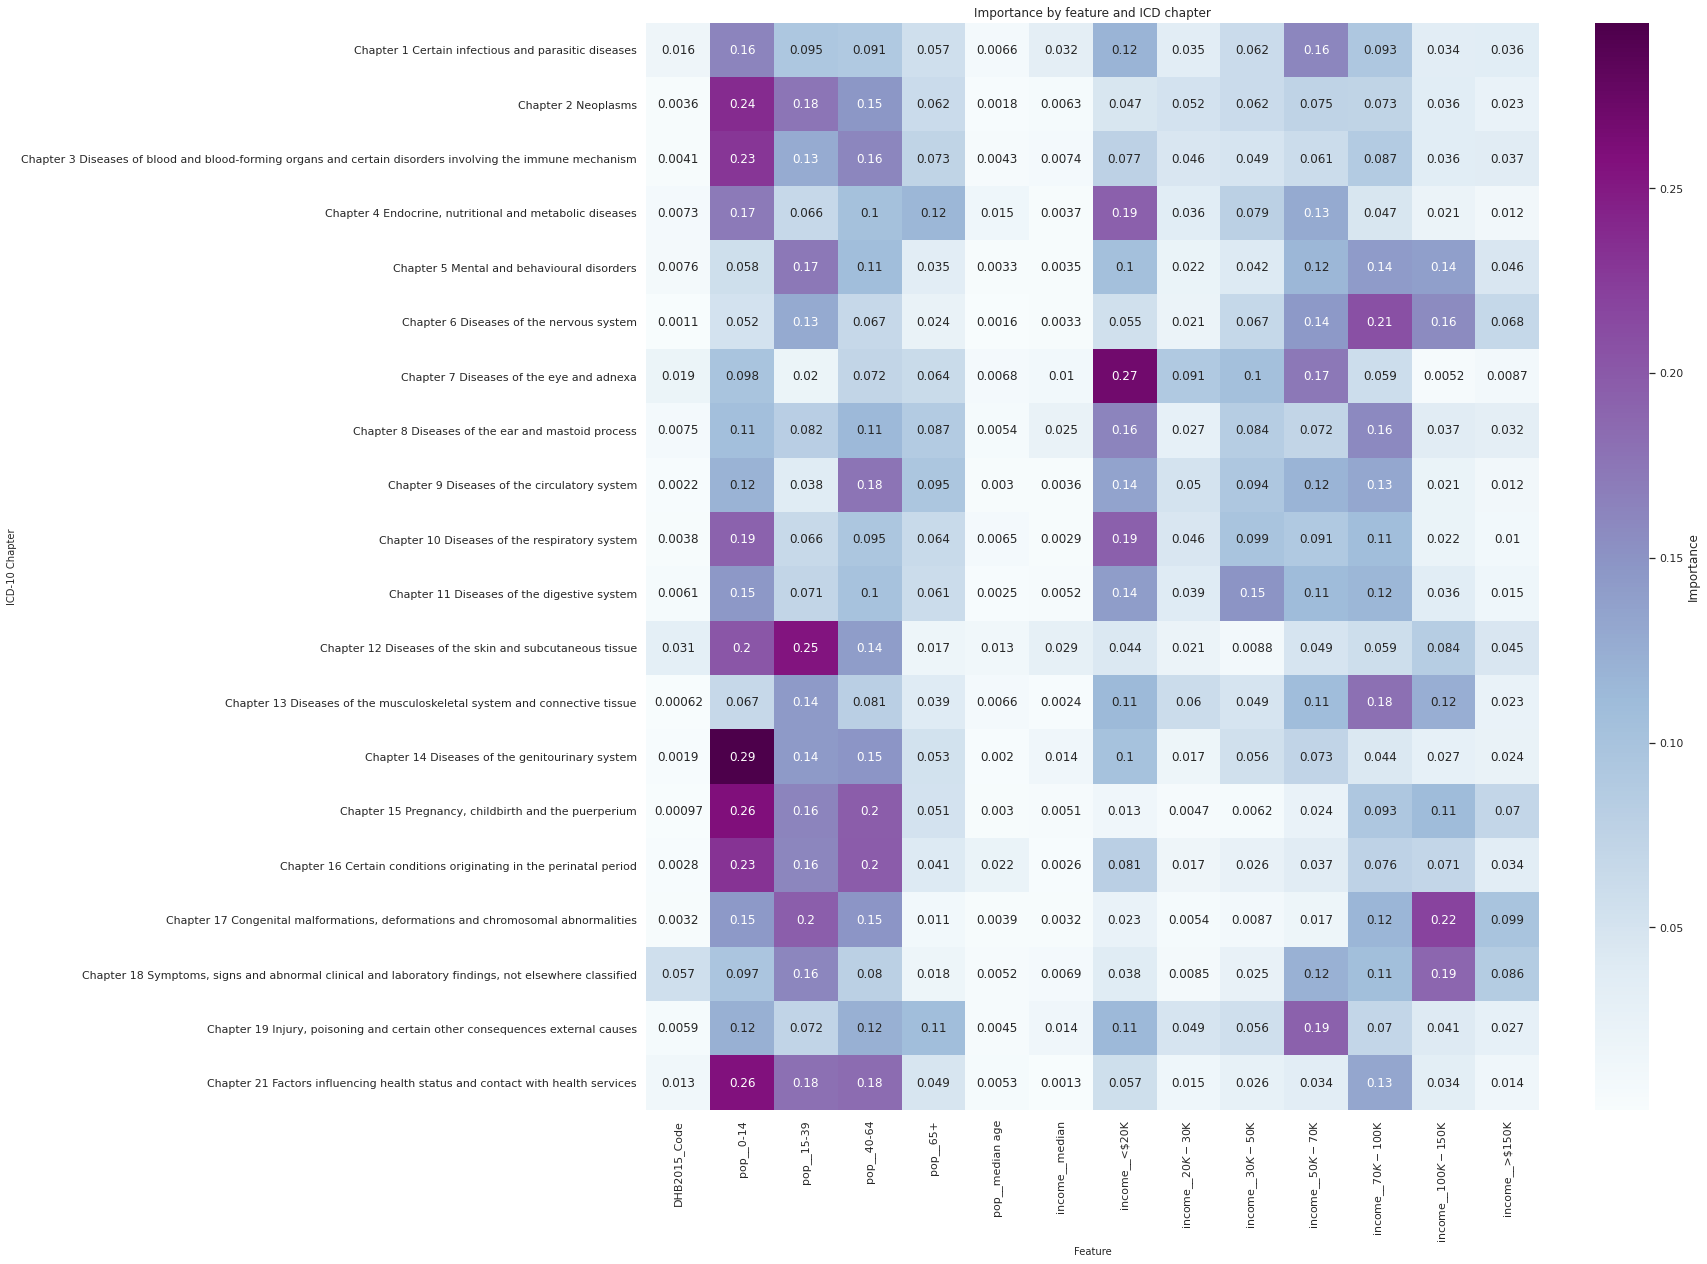

In [ ]:
# Print ExtraTreesRegressor feature importance by chapter. MultiOutputRegressor required for this.
model = MultiOutputRegressor(sklearn.ensemble.ExtraTreesRegressor())
model.fit(x_train, y_train)
print(f"{model}  score: {model.score(x_test, y_test)}")

importances = []
for c, m in zip(target_chapters, model.estimators_):
    imp = {k: v for k, v in zip(x_train.columns, m.feature_importances_)}
    imp["Chapter"] = c
    importances.append(imp)
importances = pd.DataFrame(importances).set_index("Chapter")
seaborn.heatmap(importances,
                cmap="BuPu",
                annot=True,
                #fmt="g",
                cbar_kws={'label': 'Importance'})
plt.xlabel('Feature', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("Importance by feature and ICD chapter")

In [ ]:
# ExtraTreesRegressor has the best score
model = sklearn.ensemble.ExtraTreesRegressor()
model.fit(x_test, y_test) # Train on 2018
print(f"{model} score: {model.score(x_train, y_train)}") # Predict 2013
print(f"Feature importances:")
display({k: v for k, v in zip(x_train.columns, model.feature_importances_)})

model.fit(x_train, y_train) # Train on 2013
print(f"{model} score: {model.score(x_test, y_test)}") # Predict 2018
print(f"Feature importances:")
{k: v for k, v in zip(x_train.columns, model.feature_importances_)}

ExtraTreesRegressor() score: 0.87349818504339
Feature importances:


{'DHB2015_Code': 0.008215890537082436,
 'pop__0-14': 0.15183780667018304,
 'pop__15-39': 0.13510007684800412,
 'pop__40-64': 0.20104350459009257,
 'pop__65+': 0.10315102238681323,
 'pop__median age': 0.004981651917789476,
 'income__median': 0.007701225727407299,
 'income__<$20K': 0.12083653515820095,
 'income__$20K-$30K': 0.023275307230850008,
 'income__$30K-$50K': 0.035085358271866596,
 'income__$50K-$70K': 0.07494299889678815,
 'income__$70K-$100K': 0.03920455569492607,
 'income__$100K-$150K': 0.08165469303986499,
 'income__>$150K': 0.012969373030131124}

ExtraTreesRegressor() score: 0.8581917278276876
Feature importances:


{'DHB2015_Code': 0.00680989684733512,
 'pop__0-14': 0.2823605496389701,
 'pop__15-39': 0.11050981892230188,
 'pop__40-64': 0.12306770995666878,
 'pop__65+': 0.08222921676200108,
 'pop__median age': 0.004483205562090769,
 'income__median': 0.005521347301010192,
 'income__<$20K': 0.0947714136872724,
 'income__$20K-$30K': 0.024177978840511073,
 'income__$30K-$50K': 0.02705555917893978,
 'income__$50K-$70K': 0.07817114501354548,
 'income__$70K-$100K': 0.07327186923529173,
 'income__$100K-$150K': 0.04710371829055537,
 'income__>$150K': 0.04046657076350615}

In [ ]:
pred = pd.DataFrame(model.predict(x_test))
pred.columns = target_chapters
pred.index = DHB.DHB2015_Name
pred

,Chapter 1 Certain infectious and parasitic diseases,Chapter 2 Neoplasms,Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"Chapter 4 Endocrine, nutritional and metabolic diseases",Chapter 5 Mental and behavioural disorders,Chapter 6 Diseases of the nervous system,Chapter 7 Diseases of the eye and adnexa,Chapter 8 Diseases of the ear and mastoid process,Chapter 9 Diseases of the circulatory system,Chapter 10 Diseases of the respiratory system,Chapter 11 Diseases of the digestive system,Chapter 12 Diseases of the skin and subcutaneous tissue,Chapter 13 Diseases of the musculoskeletal system and connective tissue,Chapter 14 Diseases of the genitourinary system,"Chapter 15 Pregnancy, childbirth and the puerperium",Chapter 16 Certain conditions originating in the perinatal period,"Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","Chapter 19 Injury, poisoning and certain other consequences external causes",Chapter 21 Factors influencing health status and contact with health services
DHB2015_Name,,,,,,,,,,,,,,,,,,,,
Northland,1267.08,3425.08,553.24,1045.81,1129.72,1086.32,1297.47,372.09,3611.82,3143.80,4119.19,1107.87,2309.16,2156.67,3504.88,657.77,314.96,4271.04,4449.82,4191.80
Waitemata,4567.79,8392.58,1813.00,2656.76,2825.69,3198.66,2569.25,1414.41,9889.51,8641.43,11817.36,3358.24,7688.81,7354.23,11815.44,1803.54,1197.29,18553.73,16310.02,16043.43
Auckland,3479.55,5626.76,1172.38,2279.46,2338.59,2512.92,2487.20,1173.99,6579.92,6982.73,7734.01,2831.38,5323.01,5528.94,10256.58,1525.86,887.18,10565.07,12575.41,14682.31
Counties Manukau,4249.92,7896.90,1685.43,2779.07,2605.23,3065.40,2544.06,1344.97,8958.26,8824.14,10832.61,3406.80,7025.52,6918.20,12208.73,2018.73,1183.77,15570.42,14929.82,16566.84
Waikato,3118.16,7575.39,1443.44,2394.35,2512.13,2927.78,2304.80,1096.40,7479.79,7627.07,9163.39,2497.43,5779.52,5302.74,10500.24,1676.78,896.49,11222.23,12005.15,17156.87
Lakes,827.05,2235.75,515.17,627.15,665.40,708.44,567.32,281.20,2312.66,1960.55,2736.64,673.82,1757.33,1369.64,2535.97,466.97,214.69,3634.27,2846.75,3492.40
Bay of Plenty,1969.09,3958.34,766.25,1360.54,1871.58,1788.04,1494.88,615.60,4798.62,4359.07,5528.87,1424.02,3812.38,3175.93,5274.47,854.55,521.69,6704.21,6942.15,6597.45
Tairawhiti,338.18,888.15,154.30,283.09,254.07,311.64,304.85,105.52,983.39,874.08,1099.62,269.62,657.89,622.97,913.14,153.52,91.64,982.01,1348.39,1371.14
Taranaki,892.19,2566.34,524.48,686.11,726.66,769.58,580.57,287.38,2493.67,2083.97,2992.88,742.21,1819.92,1503.99,2799.52,455.63,233.55,4059.35,3005.01,3875.49


Text(0.5, 1.0, 'Discharges by DHB and ICD chapter in 2018')

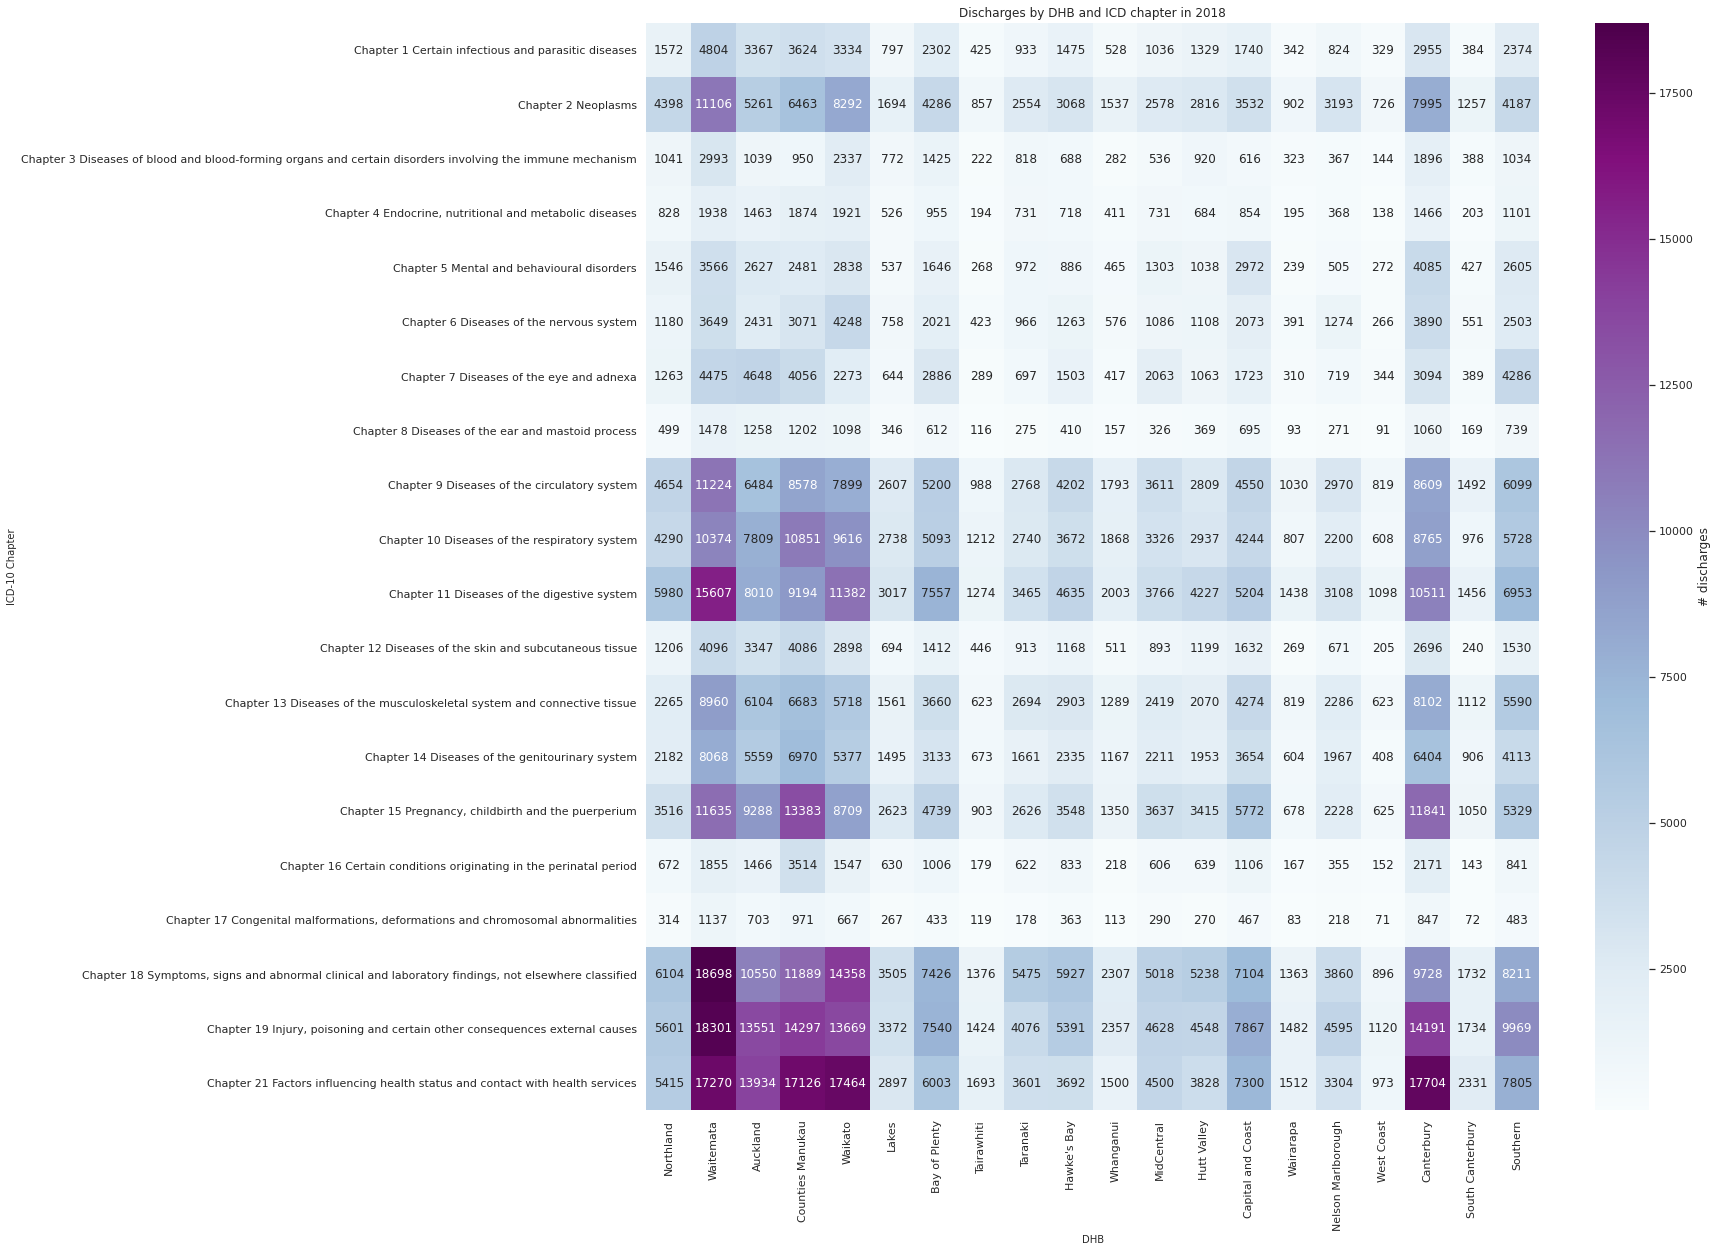

In [ ]:
seaborn.heatmap(y_test.T,
                cmap="BuPu",
                annot=True,
                fmt="g",
                cbar_kws={'label': '# discharges'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("Discharges by DHB and ICD chapter in 2018")

Text(0.5, 1.0, 'ExtraTreesRegressor model error')

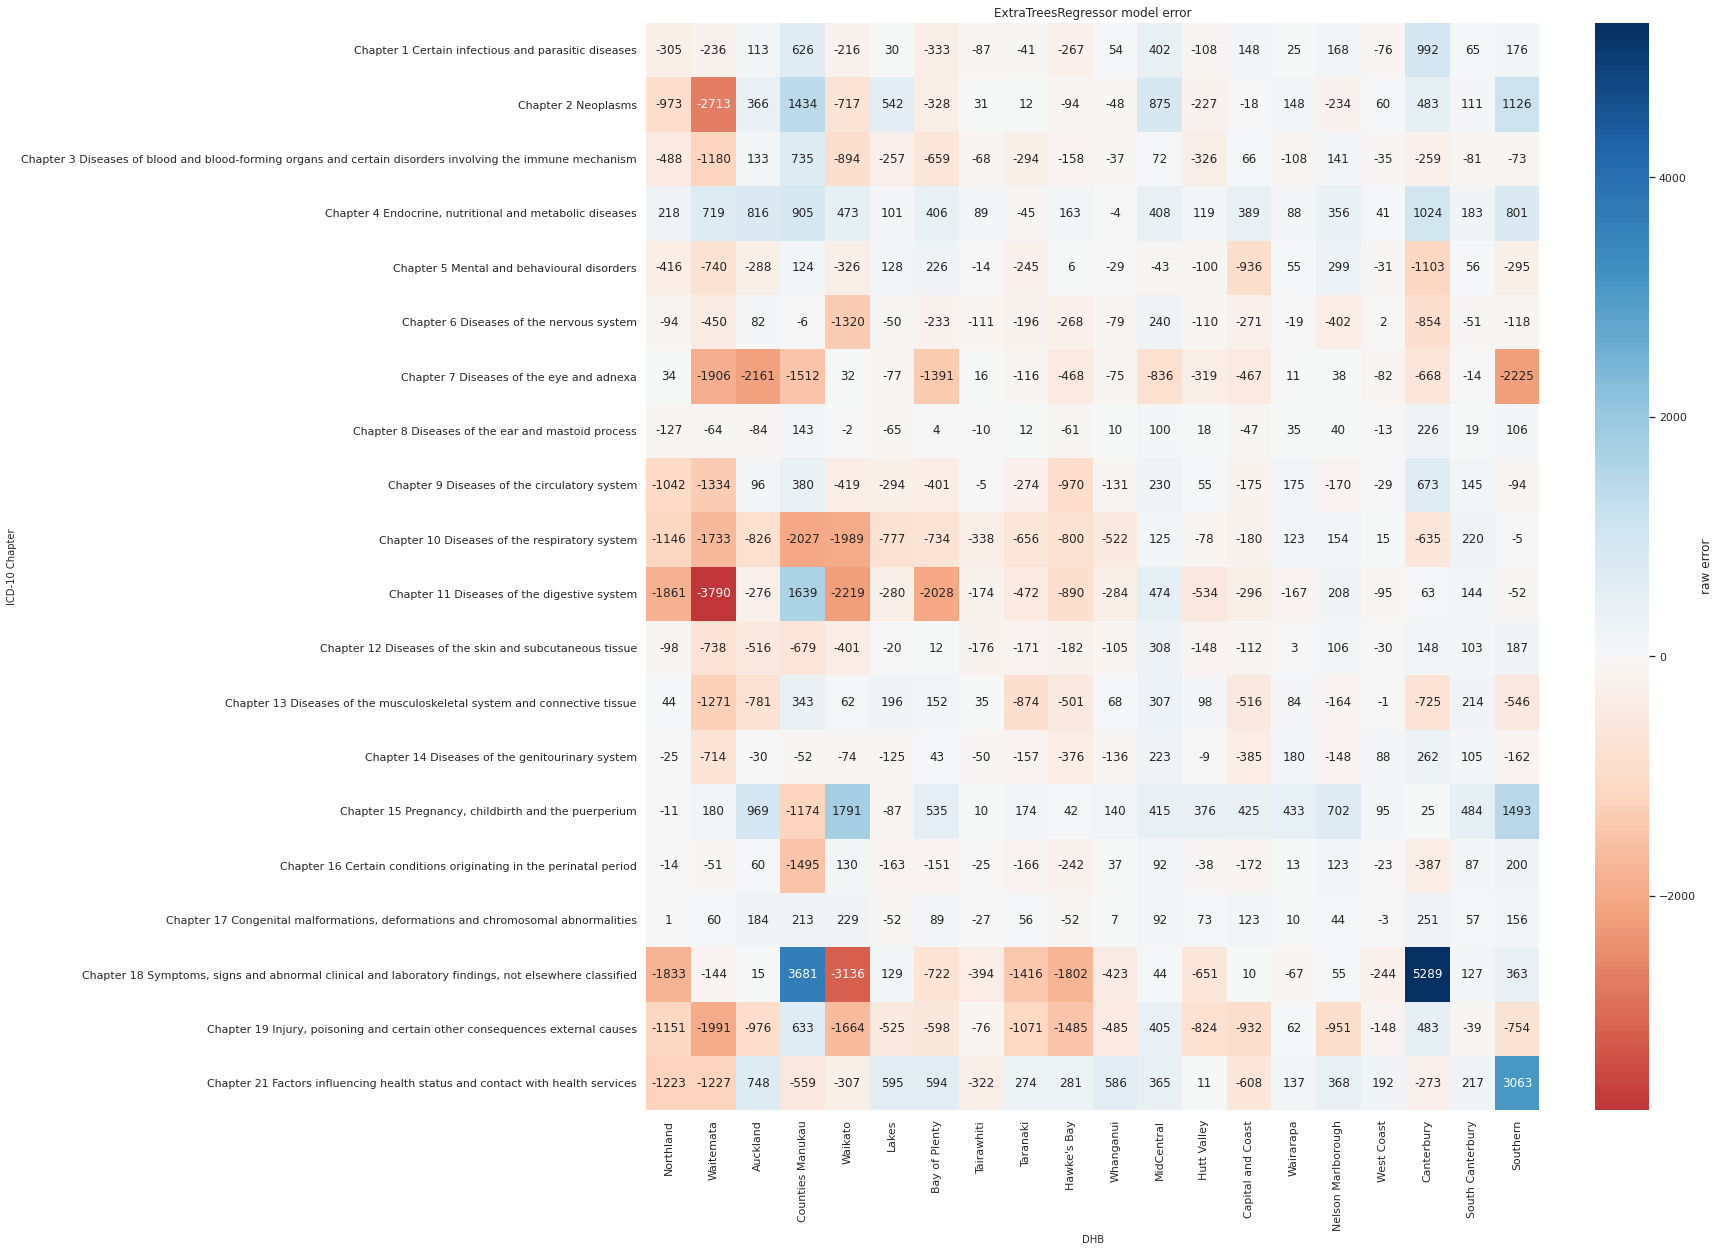

In [ ]:
err = pred - y_test
seaborn.heatmap(err.T,
                center=0,
                cmap="RdBu",
                annot=True,
                fmt=".0f",
                cbar_kws={'label': 'raw error'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("ExtraTreesRegressor model error")

Text(0.5, 1.0, 'ExtraTreesRegressor model error')

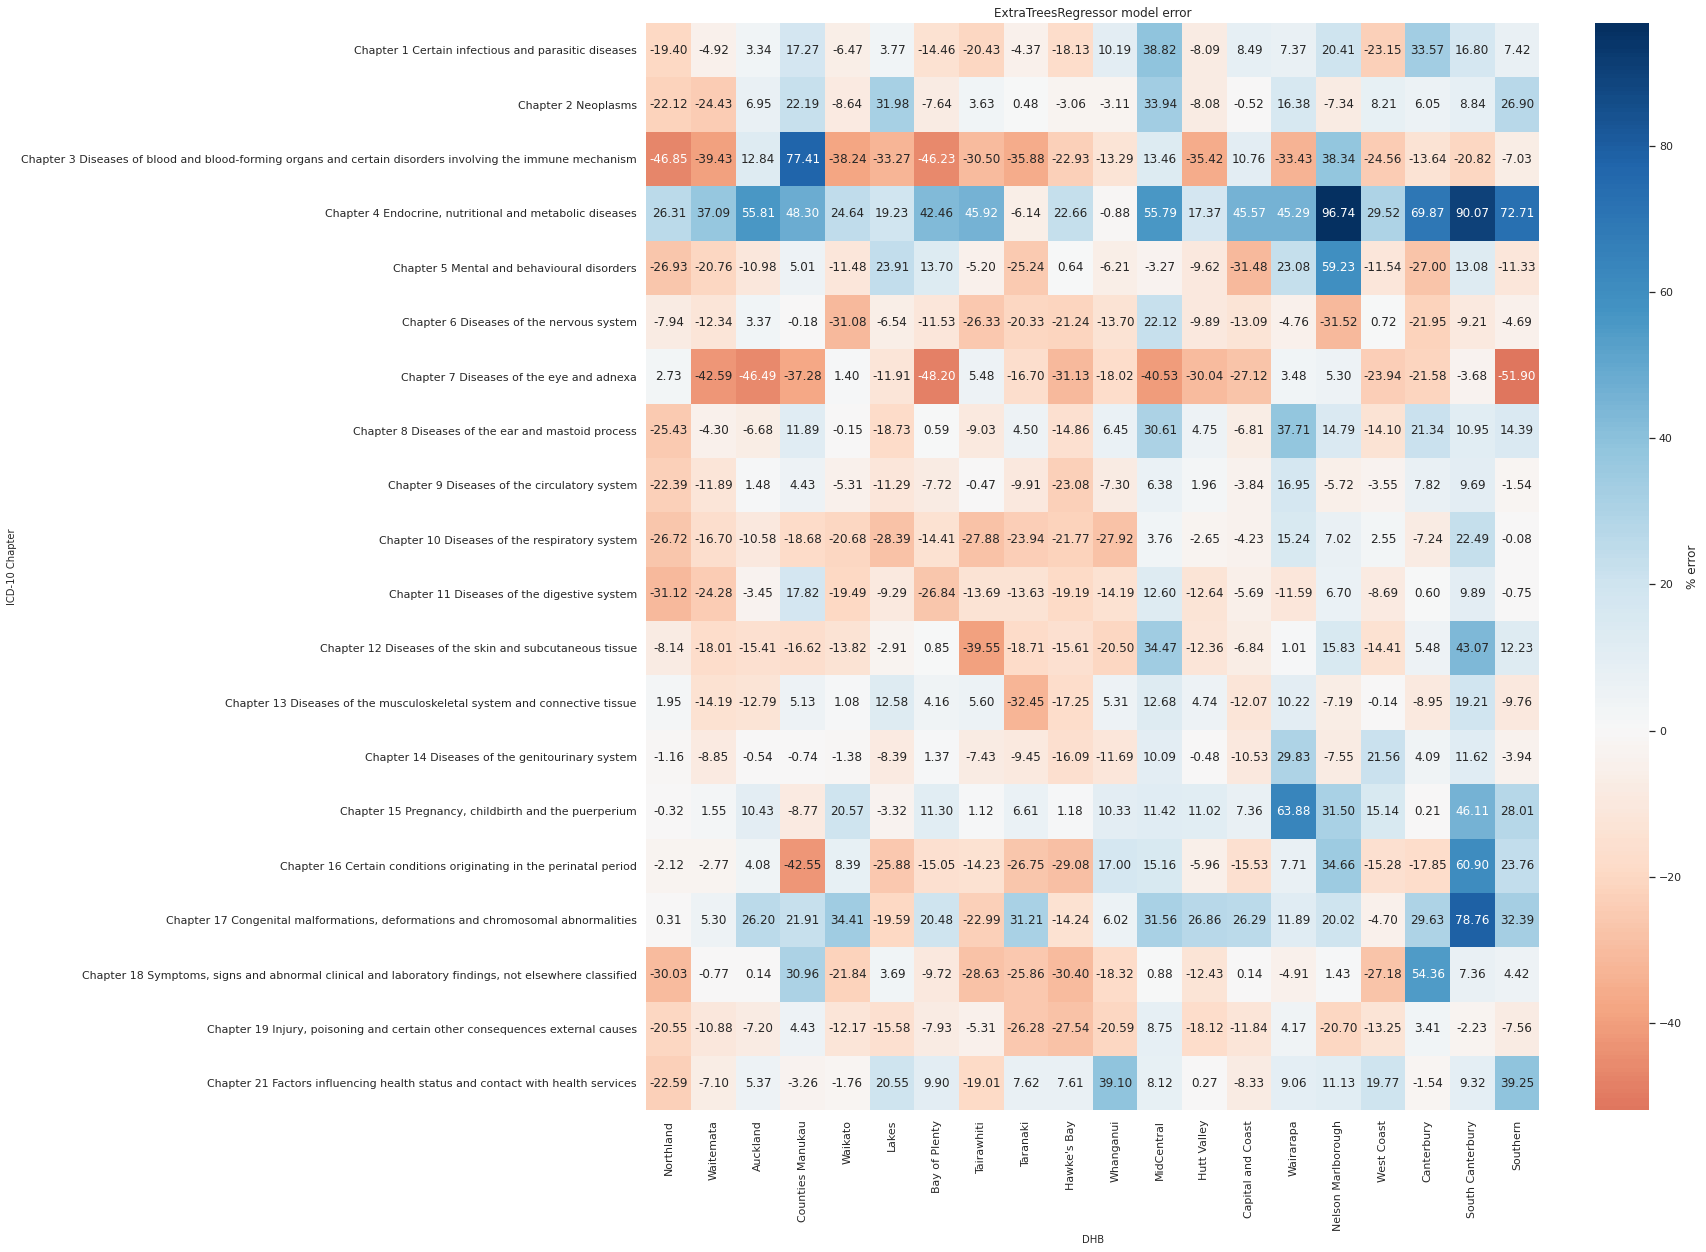

In [ ]:
pct_err = ((pred - y_test) / y_test) * 100
seaborn.heatmap(pct_err.T,
                cmap="RdBu",
                center=0,
                annot=True,
                fmt=".2f",
                cbar_kws={'label': '% error'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("ExtraTreesRegressor model error")

In [ ]:
# Now fit the model on both 2013 and 2018 data, to predict the future
x_train2 = pd.concat([x_train, x_test])
y_train2 = pd.concat((y_train, y_test))
print(x_train2.shape, y_train2.shape)

model = sklearn.ensemble.ExtraTreesRegressor()
model.fit(x_train2, y_train2)
{k: v for k, v in zip(x_train.columns, model.feature_importances_)}

(40, 14) (40, 20)


{'DHB2015_Code': 0.015331080932169384,
 'pop__0-14': 0.23770888571666682,
 'pop__15-39': 0.12550459253098903,
 'pop__40-64': 0.18657486028186612,
 'pop__65+': 0.029694280873233676,
 'pop__median age': 0.007251986853792758,
 'income__median': 0.002409686951772116,
 'income__<$20K': 0.0938969470868801,
 'income__$20K-$30K': 0.027200647404224648,
 'income__$30K-$50K': 0.011145471952096602,
 'income__$50K-$70K': 0.10793867763293609,
 'income__$70K-$100K': 0.08208006839507803,
 'income__$100K-$150K': 0.05942545864255576,
 'income__>$150K': 0.013837354745738748}

In [ ]:
# If a model is trained with income data, we would need projected income data to make predictions
# So this won't work
#future_years = ['2023', '2028', '2033', '2038', '2043', '2048']
#for year in future_years:
#    x_test, _ = get_data_for_year(year)
#    pred = pd.DataFrame(model.predict(x_test))
#    pred.columns = [f"predicted_discharges_{year}_{k}" for k in target_chapters]
#    DHB = pd.concat([DHB, pred], axis=1)

In [ ]:
#cols = [k for k in DHB.columns if "discharges" in k.lower()]
#DHB[["DHB2015_Name"] + cols].sort_values(by=f"predicted_discharges_2048_{target_chapters[0]}", ascending=False)

In [ ]:
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,income_2016_$70K-$100K,income_2017_$70K-$100K,income_2014_$100K-$150K,income_2015_$100K-$150K,income_2016_$100K-$150K,income_2017_$100K-$150K,income_2014_>$150K,income_2015_>$150K,income_2016_>$150K,income_2017_>$150K
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,8355.0,8625.0,5727.0,6525.0,7323.0,8121.0,3353.4,3934.8,4516.2,5097.6
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,27286.8,26996.4,31688.4,33448.8,35209.2,36969.6,28761.6,32752.2,36742.8,40733.4
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,20059.2,19902.6,23196.6,24259.2,25321.8,26384.4,31832.4,34819.8,37807.2,40794.6
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,21393.0,21369.0,23494.2,25337.4,27180.6,29023.8,18792.0,21732.0,24672.0,27612.0
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,21246.0,21468.0,18101.4,19804.8,21508.2,23211.6,12089.4,13705.8,15322.2,16938.6
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,5889.6,5989.8,4455.6,4897.2,5338.8,5780.4,2496.6,2866.2,3235.8,3605.4
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,12363.0,12576.0,10075.2,11228.4,12381.6,13534.8,6209.4,7378.8,8548.2,9717.6
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,2343.6,2377.8,1597.2,1781.4,1965.6,2149.8,855.6,979.2,1102.8,1226.4
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,6745.2,6816.6,5516.4,5944.8,6373.2,6801.6,3818.4,4150.8,4483.2,4815.6
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,9117.6,9241.8,6699.0,7434.0,8169.0,8904.0,3682.2,4262.4,4842.6,5422.8


In [ ]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)